# House Value Analysis

## Overview
This notebook contains comprehensive analysis of housing data using:
- **Linear Regression** for continuous price prediction
- **Logistic Regression** for binary classification (High/Low value)
- **Decision Trees** and **Random Forests** for comparison

## Table of Contents
1. Data Exploration & Preparation
2. Linear Regression Analysis
3. Binomial Logistic Regression
4. Decision Trees & Random Forests
5. Model Comparison
code

In [ ]:
# Load required libraries
library(caret)
library(MASS)
library(car)
library(caret)
library(verification)
library(rpart)
library(rpart.plot)
library(ggplot2)
library(shiny)
library(naniar)
library(ggcorrplot)
library(dplyr)
library(gridExtra)
library(Metrics)
library(pROC)
library(randomForest)
set.seed(123)

---

# Part 1: Data Exploration & Preparation

## 1.1 Load and Inspect Data

In [58]:
# Load dataset and configure factor variables
housing_df <- read.csv("housing.csv", stringsAsFactors = TRUE)
housing_df$ptRatioBin <- as.factor(housing_df$ptRatioBin)

# Display dataset dimensions and structure
dim(housing_df)
str(housing_df)

# Preview first and last rows
head(housing_df)
tail(housing_df)

# Generate summary statistics for all variables
summary(housing_df)

[1] 506  10

'data.frame':	506 obs. of  10 variables:
 $ crim      : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn        : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus     : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ rm        : num  6.58 6.42 7.18 7 7.15 ...
 $ age       : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis       : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad       : int  1 2 2 3 3 3 5 5 5 5 ...
 $ HouseValue: num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...
 $ NoxGroups : Factor w/ 3 levels "High","Low","Medium": 3 2 2 2 2 2 3 3 3 3 ...
 $ ptRatioBin: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...


,crim,zn,indus,rm,age,dis,rad,HouseValue,NoxGroups,ptRatioBin
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<fct>,<fct>
1,0.00632,18,2.31,6.575,65.2,4.0900,1,24.0,Medium,0
2,0.02731,0,7.07,6.421,78.9,4.9671,2,21.6,Low,0
3,0.02729,0,7.07,7.185,61.1,4.9671,2,34.7,Low,0
4,0.03237,0,2.18,6.998,45.8,6.0622,3,33.4,Low,0
5,0.06905,0,2.18,7.147,54.2,6.0622,3,36.2,Low,0
6,0.02985,0,2.18,6.430,58.7,6.0622,3,28.7,Low,0


,crim,zn,indus,rm,age,dis,rad,HouseValue,NoxGroups,ptRatioBin
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<fct>,<fct>
501,0.22438,0,9.69,6.027,79.7,2.4982,6,16.8,Medium,0
502,0.06263,0,11.93,6.593,69.1,2.4786,1,22.4,Medium,1
503,0.04527,0,11.93,6.120,76.7,2.2875,1,20.6,Medium,1
504,0.06076,0,11.93,6.976,91.0,2.1675,1,23.9,Medium,1
505,0.10959,0,11.93,6.794,89.3,2.3889,1,22.0,Medium,1
506,0.04741,0,11.93,6.030,80.8,2.5050,1,11.9,Medium,1


      crim                zn             indus             rm       
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :3.561  
 1st Qu.: 0.08205   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:5.886  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :6.208  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :6.285  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:6.623  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :8.780  
      age              dis              rad           HouseValue   
 Min.   :  2.90   Min.   : 1.130   Min.   : 1.000   Min.   : 5.00  
 1st Qu.: 45.02   1st Qu.: 2.100   1st Qu.: 4.000   1st Qu.:17.02  
 Median : 77.50   Median : 3.207   Median : 5.000   Median :21.20  
 Mean   : 68.57   Mean   : 3.795   Mean   : 9.549   Mean   :22.53  
 3rd Qu.: 94.08   3rd Qu.: 5.188   3rd Qu.:24.000   3rd Qu.:25.00  
 Max.   :100.00   Max.   :12.127   Max.   :24.000   Max.   :50.00  
  NoxGroups   ptRatioBin
 High  :171   0:

## 1.2 Data Quality Checks

In [59]:
# Check for missing values in each column
colSums(is.na(housing_df))

crim         zn      indus         rm        age        dis        rad 
         0          0          0          0          0          0          0 
HouseValue  NoxGroups ptRatioBin 
         0          0          0

### Check for Duplicate Rows

In [60]:
# Identify and display duplicate rows
sum(duplicated(housing_df))
housing_df[duplicated(housing_df), ]

[1] 0

crim,zn,indus,rm,age,dis,rad,HouseValue,NoxGroups,ptRatioBin
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<fct>,<fct>


## 1.3 Target Variable Distribution Analysis

[1] 1.101537

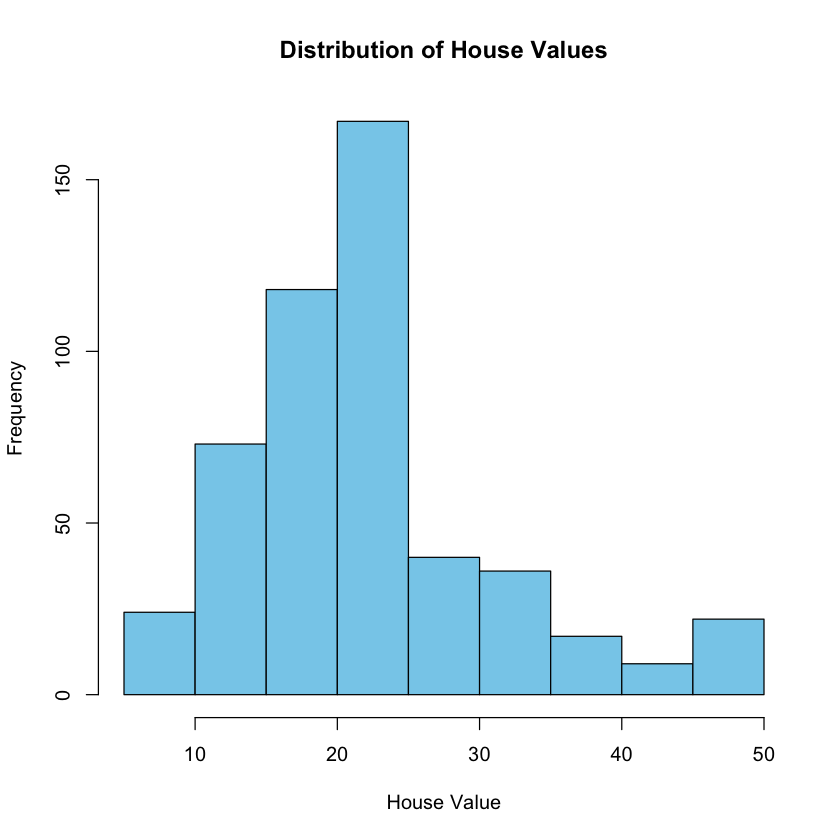

In [61]:
# Visualize distribution of house values
hist(housing_df$HouseValue, main="Distribution of House Values", 
     xlab="House Value", col="skyblue")

# Calculate skewness to assess distribution shape
library(e1071)
skewness(housing_df$HouseValue)

**Key Observations:**
- Distribution is right-skewed with outliers on the upper end
- Most houses priced around $20k
- Non-normal distribution may affect linear regression assumptions

## 1.4 Outlier Detection

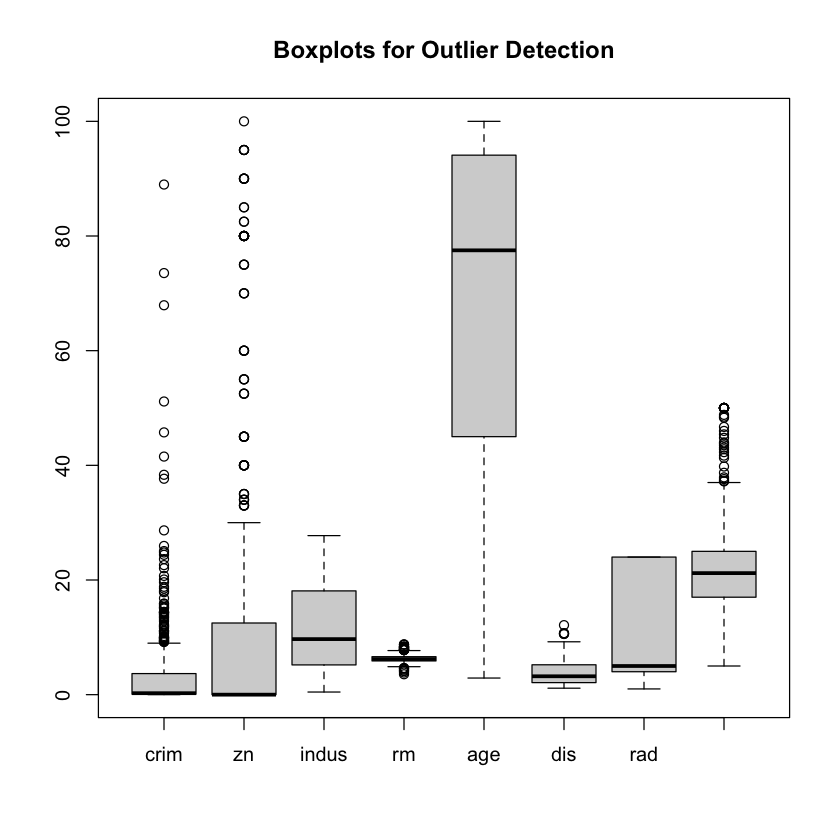

In [62]:
# Visualize outliers using boxplots for all numeric variables
boxplot(housing_df[, sapply(housing_df, is.numeric)], 
        main="Boxplots for Outlier Detection")

# Identify outliers using z-score method (|z| > 3)
z_scores <- scale(housing_df[, sapply(housing_df, is.numeric)])
outliers <- which(abs(z_scores) > 3, arr.ind=TRUE)

**Notable Patterns:**
- `crim`: Extremely right-skewed with numerous outliers
- `zn` (residential land zoning): Multiple outliers present
- `age`: Centered around older properties
- `rm`: Relatively normal distribution

## 1.5 Correlation Analysis

                 crim         zn      indus         rm        age        dis
crim        1.0000000 -0.2004692  0.4065834 -0.2192467  0.3527343 -0.3796701
zn         -0.2004692  1.0000000 -0.5338282  0.3119906 -0.5695373  0.6644082
indus       0.4065834 -0.5338282  1.0000000 -0.3916759  0.6447785 -0.7080270
rm         -0.2192467  0.3119906 -0.3916759  1.0000000 -0.2402649  0.2052462
age         0.3527343 -0.5695373  0.6447785 -0.2402649  1.0000000 -0.7478805
dis        -0.3796701  0.6644082 -0.7080270  0.2052462 -0.7478805  1.0000000
rad         0.6255051 -0.3119478  0.5951293 -0.2098467  0.4560225 -0.4945879
HouseValue -0.3883046  0.3604453 -0.4837252  0.6953599 -0.3769546  0.2499287
                  rad HouseValue
crim        0.6255051 -0.3883046
zn         -0.3119478  0.3604453
indus       0.5951293 -0.4837252
rm         -0.2098467  0.6953599
age         0.4560225 -0.3769546
dis        -0.4945879  0.2499287
rad         1.0000000 -0.3816262
HouseValue -0.3816262  1.0000000


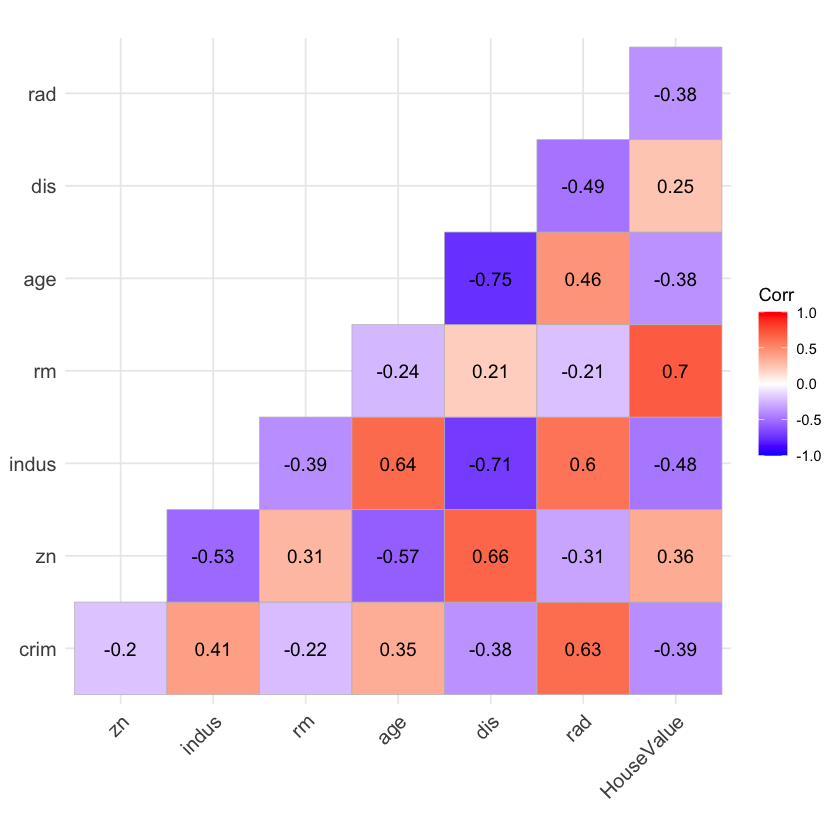

In [63]:
# Calculate correlation matrix for numeric variables
cor_matrix <- cor(housing_df[, sapply(housing_df, is.numeric)])
print(cor_matrix)

# Create visual correlation heatmap
ggcorrplot(cor_matrix, lab=TRUE, type="lower")

**Strong Positive Correlations with HouseValue:**
- `rm` (0.70): More rooms → higher value
- `zn` (0.36): Residential zoning → higher value

**Strong Negative Correlations with HouseValue:**
- `indus` (-0.48): More industry → lower values
- `dis` (-0.49): Distance from employment → lower values
- `crim` (-0.39): Higher crime → lower values
- `rad` (-0.38): Highway accessibility → lower values

**Multicollinearity Concerns:**
- `age` ↔ `dis` (-0.75): Old homes close to employment centers
- `indus` ↔ `age` (0.64): Industrial areas have older homes
- `rad` ↔ `indus` (0.60): Highway access near industries

*Note: BIC model selection will address multicollinearity*

## 1.6 Relationship Visualization

`geom_smooth()` using formula = 'y ~ x'


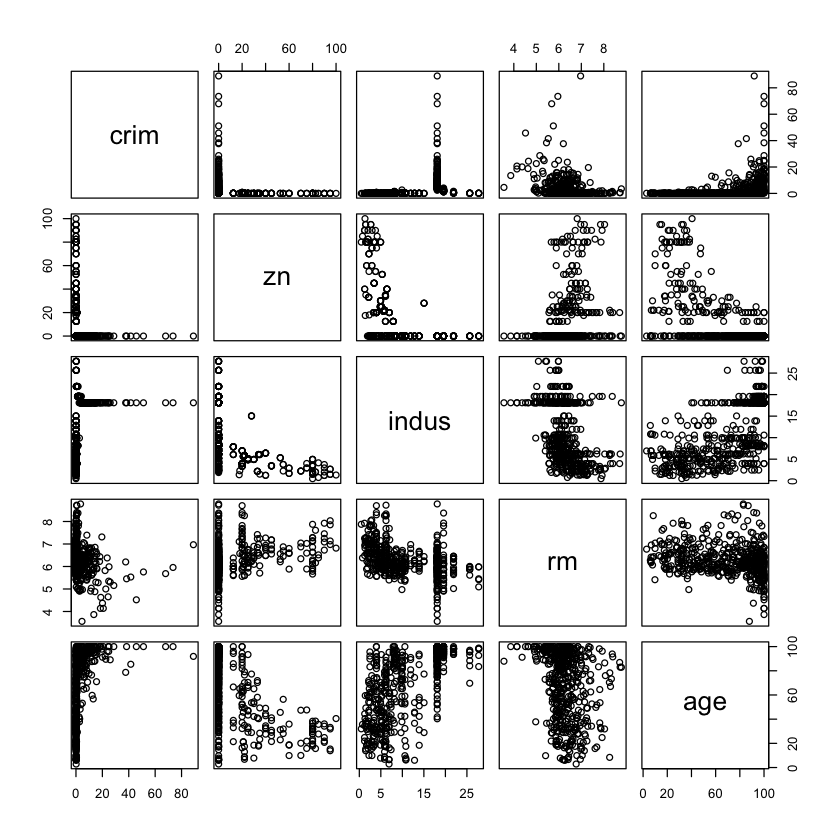

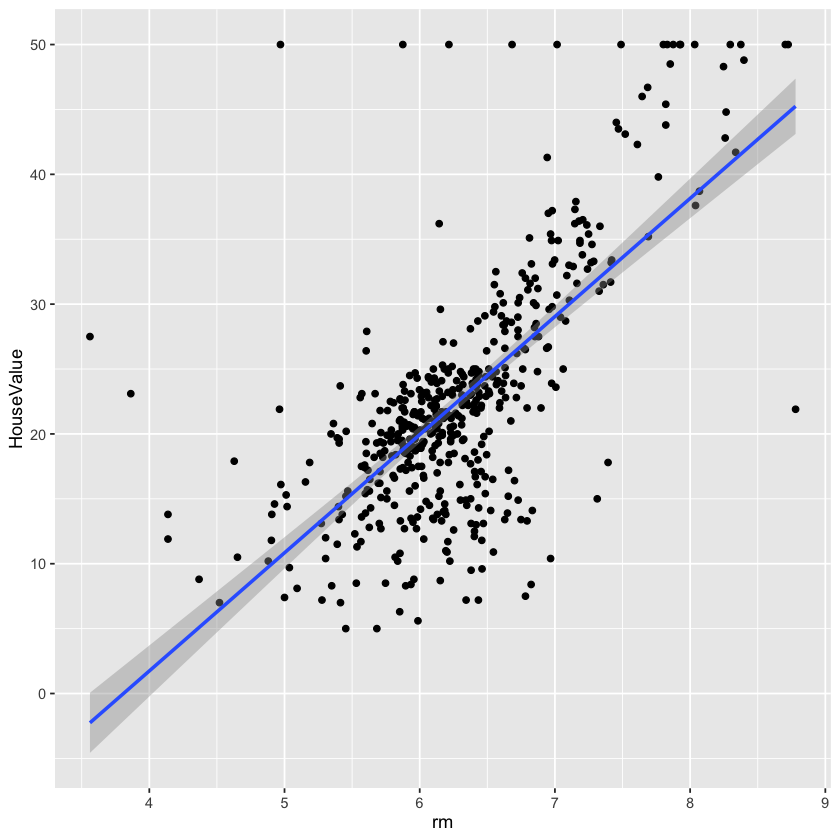

In [64]:
# Create scatterplot matrix for first 5 variables
pairs(housing_df[, 1:5])

# Plot relationship between rooms and house value
library(ggplot2)
ggplot(housing_df, aes(x=rm, y=HouseValue)) +
  geom_point() +
  geom_smooth(method="lm")

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


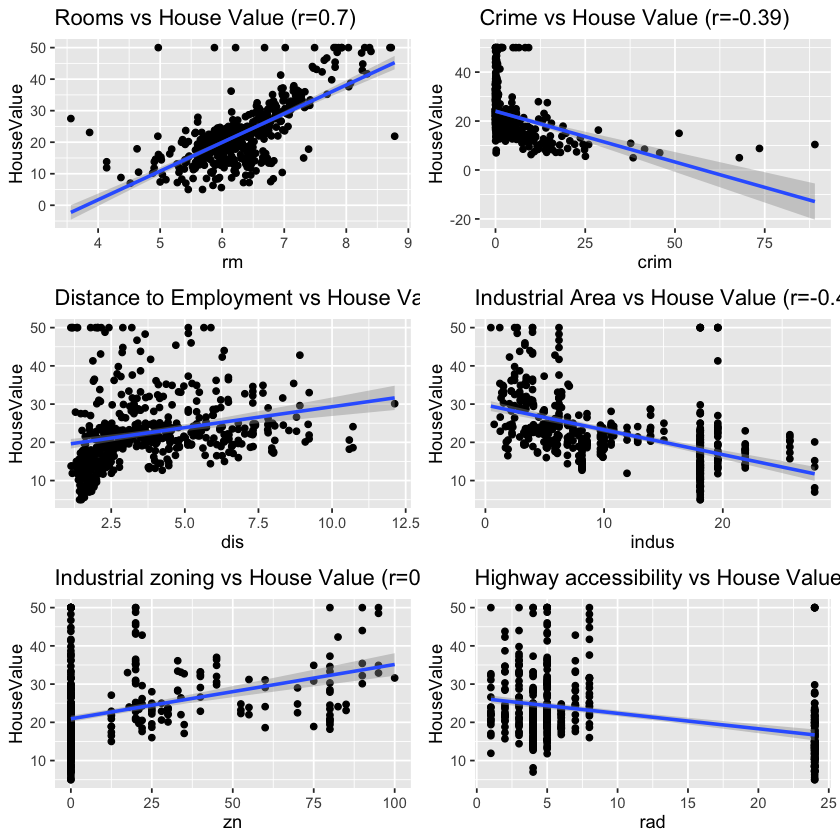

In [65]:
# Create individual plots for key predictors vs house value
p1 <- ggplot(housing_df, aes(x=rm, y=HouseValue)) +
  geom_point() + geom_smooth(method="lm") +
  labs(title="Rooms vs House Value (r=0.7)")

p2 <- ggplot(housing_df, aes(x=crim, y=HouseValue)) +
  geom_point() + geom_smooth(method="lm") +
  labs(title="Crime vs House Value (r=-0.39)")

p3 <- ggplot(housing_df, aes(x=dis, y=HouseValue)) +
  geom_point() + geom_smooth(method="lm") +
  labs(title="Distance to Employment vs House Value (r=-0.49)")

p4 <- ggplot(housing_df, aes(x=indus, y=HouseValue)) +
  geom_point() + geom_smooth(method="lm") +
  labs(title="Industrial Area vs House Value (r=-0.48)")

p5 <- ggplot(housing_df, aes(x=zn, y=HouseValue)) +
  geom_point() + geom_smooth(method="lm") +
  labs(title="Industrial zoning vs House Value (r=0.36)")

p6 <- ggplot(housing_df, aes(x=rad, y=HouseValue)) +
  geom_point() + geom_smooth(method="lm") +
  labs(title="Highway accessibility vs House Value (r=-0.38)")

# Display all plots in grid layout
grid.arrange(p1, p2, p3, p4, p5, p6, ncol=2)

## 1.7 Train-Test Split

In [66]:
# Create 80/20 train-test split (stratified by target variable)
set.seed(123)
inTrain <- createDataPartition(housing_df$HouseValue, p = 0.8, list = F)
train_h <- housing_df[inTrain,]
test_h <- housing_df[-inTrain,]

# Save datasets for reproducibility
write.csv(train_h, "train_housing.csv", row.names = FALSE)
write.csv(test_h, "test_housing.csv", row.names = FALSE)

---

# Part 2: Linear Regression Analysis

## 2.1 Linear Regression Assumptions

**Key assumptions to test:**

1. **Normality of Residuals**
   - Test: Shapiro-Wilk test
   - Visualization: Q-Q plot

2. **Homoscedasticity** (constant variance of residuals)
   - Qualitative: Residuals vs fitted values plot
   - Quantitative: NCV test, Breusch-Pagan test

3. **Independence of Errors**
   - Test: Durbin-Watson test

4. **Multicollinearity** (no linear relationship between predictors)
   - Test: VIF (Variance Inflation Factor)
   - VIF > 5 or 10 indicates problematic multicollinearity

**Important notes:**
- If normality/homoscedasticity violated: Can still proceed but p-values may be biased
- Consider log transformation if needed
- BIC/AIC will identify best predictors to handle multicollinearity

In [67]:
# Fit full linear regression model with all predictors
h_lin_full_fit <- lm(HouseValue ~ ., data = train_h)
summary(h_lin_full_fit)


Call:
lm(formula = HouseValue ~ ., data = train_h)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.086  -3.126  -0.671   2.148  37.948 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -2.75817    3.99788  -0.690 0.490656    
crim            -0.20342    0.04552  -4.469 1.03e-05 ***
zn               0.04009    0.01851   2.165 0.030978 *  
indus           -0.30427    0.07674  -3.965 8.71e-05 ***
rm               6.40606    0.44101  14.526  < 2e-16 ***
age             -0.05876    0.01758  -3.343 0.000906 ***
dis             -1.34196    0.28179  -4.762 2.69e-06 ***
rad              0.02146    0.05677   0.378 0.705697    
NoxGroupsLow    -1.23220    1.46189  -0.843 0.399803    
NoxGroupsMedium -1.61677    1.04446  -1.548 0.122433    
ptRatioBin1     -3.37454    0.87461  -3.858 0.000133 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.724 on 396 degrees of freedom
Multiple R-squared:  0.6198,	A

## 2.2 Assumption Testing

### Test 1: Normality of Residuals

In [68]:
# Shapiro-Wilk test for normality of residuals
print("=== Shapiro-Wilk Normality Test ===")
shapiro_test <- shapiro.test(residuals(h_lin_full_fit))
print(shapiro_test)

# Interpret results
if (shapiro_test$p.value < 0.05) {
  print("Result: Residuals are NOT normally distributed (p < 0.05)")
} else {
  print("Result: Residuals are normally distributed (p >= 0.05)")
}

[1] "=== Shapiro-Wilk Normality Test ==="

	Shapiro-Wilk normality test

data:  residuals(h_lin_full_fit)
W = 0.8484, p-value < 2.2e-16



[1] "Result: Residuals are NOT normally distributed (p < 0.05)"


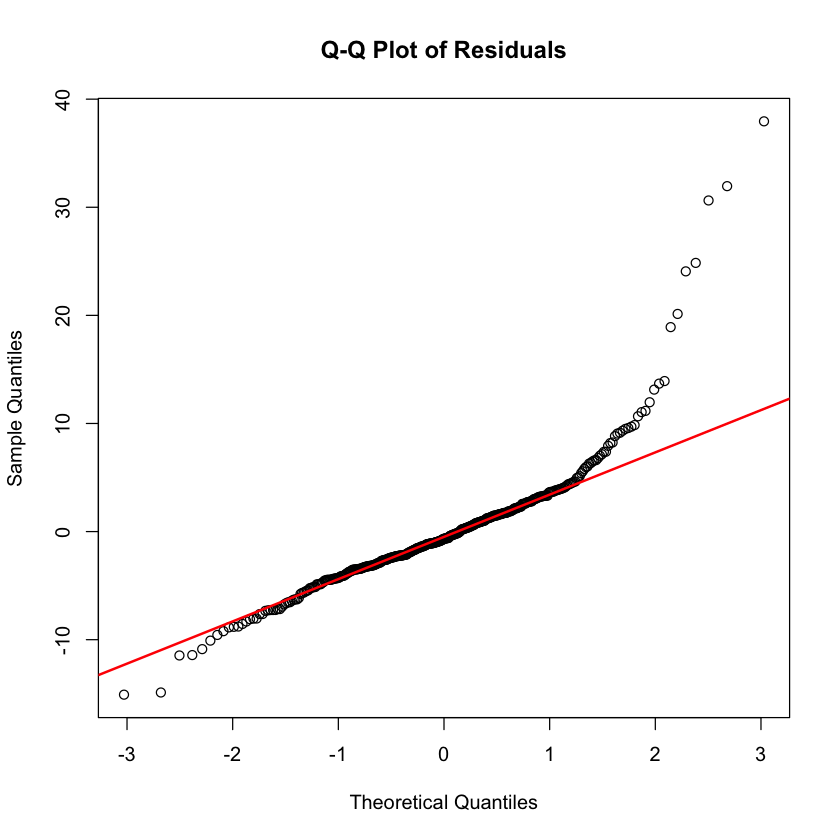

In [69]:
# Visual assessment of normality using Q-Q plot
qqnorm(residuals(h_lin_full_fit), main = "Q-Q Plot of Residuals")
qqline(residuals(h_lin_full_fit), col = "red", lwd = 2)

### Test 2: Homoscedasticity (Constant Variance)

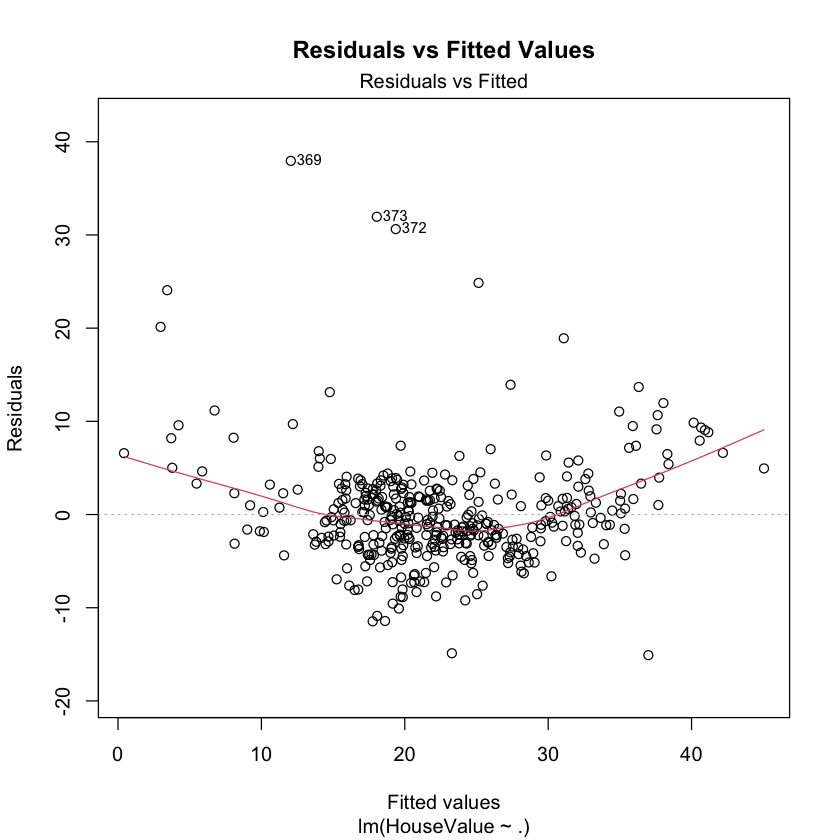

In [70]:
# Visual check: Residuals vs Fitted values
plot(h_lin_full_fit, which = 1, main = "Residuals vs Fitted Values")

In [71]:
# Non-Constant Variance (NCV) test for homoscedasticity
library(car)
print("=== Non-Constant Variance Score Test ===")
ncv_test <- ncvTest(h_lin_full_fit)
print(ncv_test)

# Interpret results
if (ncv_test$p < 0.05) {
  print("Result: Non-constant variance detected (p < 0.05)")
} else {
  print("Result: Constant variance (p >= 0.05)")
}

[1] "=== Non-Constant Variance Score Test ==="
Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 15.06922, Df = 1, p = 0.00010364
[1] "Result: Non-constant variance detected (p < 0.05)"


### Test 3: Independence of Errors

In [72]:
# Durbin-Watson test for autocorrelation in residuals
print("=== Durbin-Watson Test ===")
dw_test <- durbinWatsonTest(h_lin_full_fit)
print(dw_test)

# Interpretation guidance
cat("\nInterpretation:\n")
cat("DW statistic close to 2 = No autocorrelation\n")
cat("DW statistic < 2 = Positive autocorrelation\n")
cat("DW statistic > 2 = Negative autocorrelation\n\n")

# Interpret results
if (dw_test$p < 0.05) {
  print("Result: Autocorrelation detected (p < 0.05)")
  print("Residuals are NOT independent")
} else {
  print("Result: No significant autocorrelation (p >= 0.05)")
  print("Residuals are independent")
}

[1] "=== Durbin-Watson Test ==="


 lag Autocorrelation D-W Statistic p-value
   1       0.5376939     0.9190245       0
 Alternative hypothesis: rho != 0

Interpretation:
DW statistic close to 2 = No autocorrelation
DW statistic < 2 = Positive autocorrelation
DW statistic > 2 = Negative autocorrelation

[1] "Result: Autocorrelation detected (p < 0.05)"
[1] "Residuals are NOT independent"


### Test 4: Multicollinearity

In [73]:
# Calculate Variance Inflation Factor (VIF) for multicollinearity
library(car)
print("=== Variance Inflation Factor (VIF) ===")
vif_values <- vif(h_lin_full_fit)
print(vif_values)

# VIF interpretation guidelines
cat("\n--- VIF Interpretation ---\n")
cat("VIF = 1: No correlation\n")
cat("VIF 1-5: Moderate correlation (acceptable)\n")
cat("VIF 5-10: High correlation (problematic)\n")
cat("VIF > 10: Very high correlation (remove variable)\n\n")

# Identify problematic variables
high_vif <- vif_values[vif_values > 5]
if (length(high_vif) > 0) {
  cat("⚠️ Variables with VIF > 5 (Multicollinearity concern):\n")
  print(high_vif)
} else {
  cat("✓ No variables with VIF > 5\n")
}

[1] "=== Variance Inflation Factor (VIF) ==="
               GVIF Df GVIF^(1/(2*Df))
crim       1.752870  1        1.323960
zn         2.191559  1        1.480392
indus      3.383286  1        1.839371
rm         1.283239  1        1.132801
age        2.902584  1        1.703697
dis        4.269309  1        2.066231
rad        3.106253  1        1.762457
NoxGroups  6.239570  2        1.580479
ptRatioBin 2.338083  1        1.529079

--- VIF Interpretation ---
VIF = 1: No correlation
VIF 1-5: Moderate correlation (acceptable)
VIF 5-10: High correlation (problematic)


VIF > 10: Very high correlation (remove variable)

⚠️ Variables with VIF > 5 (Multicollinearity concern):
[1] 6.23957


## 2.3 Model Selection Using BIC

In [74]:
# Perform stepwise regression using BIC criterion
# Note: Some assumptions violated but proceeding with model selection
h_lin_step_model <- step(h_lin_full_fit, k = log(nrow(train_h)))
summary(h_lin_step_model)

Start:  AIC=1475.13
HouseValue ~ crim + zn + indus + rm + age + dis + rad + NoxGroups + 
    ptRatioBin

             Df Sum of Sq   RSS    AIC
- NoxGroups   2      84.1 13060 1465.8
- rad         1       4.7 12980 1469.3
- zn          1     153.6 13129 1473.9
<none>                    12976 1475.1
- age         1     366.3 13342 1480.5
- ptRatioBin  1     487.8 13463 1484.1
- indus       1     515.1 13491 1485.0
- crim        1     654.5 13630 1489.2
- dis         1     743.1 13719 1491.8
- rm          1    6913.8 19889 1643.0

Step:  AIC=1465.75
HouseValue ~ crim + zn + indus + rm + age + dis + rad + ptRatioBin

             Df Sum of Sq   RSS    AIC
- rad         1      20.3 13080 1460.4
<none>                    13060 1465.8
- zn          1     262.5 13322 1467.8
- age         1     348.2 13408 1470.5
- indus       1     438.7 13498 1473.2
- ptRatioBin  1     576.0 13636 1477.3
- crim        1     612.4 13672 1478.4
- dis         1     929.5 13989 1487.7
- rm          1    6997.9 2


Call:
lm(formula = HouseValue ~ crim + zn + indus + rm + age + dis + 
    ptRatioBin, data = train_h)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.607  -3.128  -0.785   2.023  38.546 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.81630    3.71622  -1.296 0.195717    
crim        -0.17964    0.04055  -4.430 1.22e-05 ***
zn           0.05082    0.01745   2.913 0.003779 ** 
indus       -0.24700    0.06906  -3.576 0.000391 ***
rm           6.47429    0.43790  14.785  < 2e-16 ***
age         -0.05504    0.01662  -3.312 0.001011 ** 
dis         -1.41648    0.25865  -5.476 7.70e-08 ***
ptRatioBin1 -3.16483    0.72872  -4.343 1.78e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.726 on 399 degrees of freedom
Multiple R-squared:  0.6167,	Adjusted R-squared:   0.61 
F-statistic: 91.71 on 7 and 399 DF,  p-value: < 2.2e-16


### BIC Model Comparison

In [ ]:
# Create models from stepwise progression for comparison

# Model 0: Full model with all predictors
model_step0 <- lm(HouseValue ~ crim + zn + indus + rm + age + dis + rad + NoxGroups + ptRatioBin, data = train_h)

# Model 1: Removed NoxGroups
model_step1 <- lm(HouseValue ~ crim + zn + indus + rm + age + dis + rad + ptRatioBin, data = train_h)

# Model 2 (Final): Removed rad and NoxGroups
model_final <- lm(HouseValue ~ crim + zn + indus + rm + age + dis + ptRatioBin, data = train_h)

# Calculate BIC for all models
bic_step0 <- BIC(h_lin_full_fit)
bic_step1 <- BIC(model_step1)
bic_final <- BIC(h_lin_step_model)

# Create comparison table
model_comparison <- data.frame(
  Model = c("Step 0 (NoxGroups + rad)", "Step 1 (rad)", "Final (best)"),
  BIC = c(bic_step0, bic_step1, bic_final),
  NumPredictors = c(9, 8, 7)
)
print("BIC Comparison Table:")
print(model_comparison)
print("\n--- Bayes Factor Analysis ---")
bf_step0_vs_step1 <- exp((bic_step0 - bic_step1)/2)
print(paste("BF (Full model vs Step1):", round(bf_step0_vs_step1, 2)))
print(paste("Step1 is", round(bf_step0_vs_step1, 2), "times more likely than Full model"))

bf_step1_vs_final <- exp((bic_step1 - bic_final)/2)
print(paste("\nBF (Step1 vs Final):", round(bf_step1_vs_final, 2)))
print(paste("Final is", round(bf_step1_vs_final, 2), "times more likely than Step1"))

bf_step0_vs_final <- exp((bic_step0 - bic_final)/2)
print(paste("\nBF (Full model vs Final):", round(bf_step0_vs_final, 2)))
print(paste("Final is", round(bf_step0_vs_final, 2), "times more likely than Full model"))

[1] "BIC Comparison Table:"


                     Model      BIC NumPredictors
1 Step 0 (NoxGroups + rad) 2636.158             9
2             Step 1 (rad) 2626.771             8
3             Final (best) 2621.393             7
[1] "\n--- Bayes Factor Analysis ---"
[1] "BF (Full model vs Step1): 109.27"
[1] "Step1 is 109.27 times more likely than Full model"
[1] "\nBF (Step1 vs Final): 14.72"
[1] "Final is 14.72 times more likely than Step1"
[1] "\nBF (Full model vs Final): 1607.87"
[1] "Final is 1607.87 times more likely than Full model"


## 2.4 Model Predictions and Evaluation

In [76]:
# Display final model summary
summary(h_lin_step_model)


Call:
lm(formula = HouseValue ~ crim + zn + indus + rm + age + dis + 
    ptRatioBin, data = train_h)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.607  -3.128  -0.785   2.023  38.546 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.81630    3.71622  -1.296 0.195717    
crim        -0.17964    0.04055  -4.430 1.22e-05 ***
zn           0.05082    0.01745   2.913 0.003779 ** 
indus       -0.24700    0.06906  -3.576 0.000391 ***
rm           6.47429    0.43790  14.785  < 2e-16 ***
age         -0.05504    0.01662  -3.312 0.001011 ** 
dis         -1.41648    0.25865  -5.476 7.70e-08 ***
ptRatioBin1 -3.16483    0.72872  -4.343 1.78e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.726 on 399 degrees of freedom
Multiple R-squared:  0.6167,	Adjusted R-squared:   0.61 
F-statistic: 91.71 on 7 and 399 DF,  p-value: < 2.2e-16


**Final Model Summary:**

Using BIC for variable retention, the final model includes: `crim + zn + indus + rm + age + dis + ptRatioBin`

**Key findings:**
- Model explains 61% of variance in house values (training data)
- Significantly better than intercept-only model: F(7, 399) = 91.71, p < 0.001
- All predictors are statistically significant

In [77]:
# Generate predictions on test data
predictions <- predict(h_lin_step_model, newdata = test_h)

# Also generate predictions using full model for comparison
full_model_predictions <- predict(h_lin_full_fit, newdata = test_h)

### Performance Metrics

In [78]:
# Function to calculate and display regression metrics
evaluate_regression <- function(actual, predicted) {
    mae_value <- mae(actual, predicted)
    mse_value <- mse(actual, predicted)
    rmse_value <- rmse(actual, predicted)
    r2_value <- R2(predicted, actual)
    print(paste("MAE on Test Data:", round(mae_value, 2)))
    print(paste("MSE on Test Data:", round(mse_value, 2)))
    print(paste("RMSE on Test Data:", round(rmse_value, 2)))
    print(paste("R-squared on Test Data:", round(r2_value, 4)))
}

# Evaluate final model
print("Final Model Performance on Test Data:\n")
evaluate_regression(test_h$HouseValue, predictions)

# Evaluate full model for comparison
print("\nFull Model Performance on Test Data:")
evaluate_regression(test_h$HouseValue, full_model_predictions)

[1] "Final Model Performance on Test Data:\n"
[1] "MAE on Test Data: 3.64"
[1] "MSE on Test Data: 29.1"
[1] "RMSE on Test Data: 5.39"
[1] "R-squared on Test Data: 0.6762"
[1] "\nFull Model Performance on Test Data:"
[1] "MAE on Test Data: 3.67"
[1] "MSE on Test Data: 29.26"
[1] "RMSE on Test Data: 5.41"
[1] "R-squared on Test Data: 0.6722"


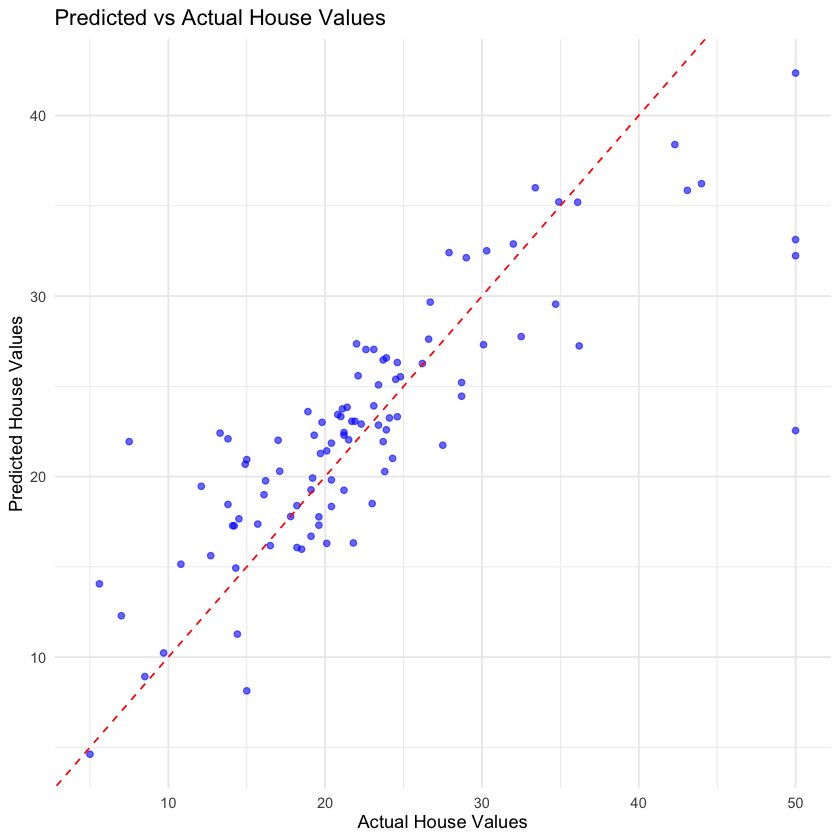

In [79]:
# Visualize predicted vs actual values
library(ggplot2)
results_df <- data.frame(Actual = test_h$HouseValue, Predicted = predictions)
ggplot(results_df, aes(x = Actual, y = Predicted)) +
  geom_point(color = 'blue', alpha = 0.6) +
  geom_abline(slope = 1, intercept = 0, color = 'red', linetype = 'dashed') +
  labs(title = "Predicted vs Actual House Values",
       x = "Actual House Values",
       y = "Predicted House Values") +
  theme_minimal()

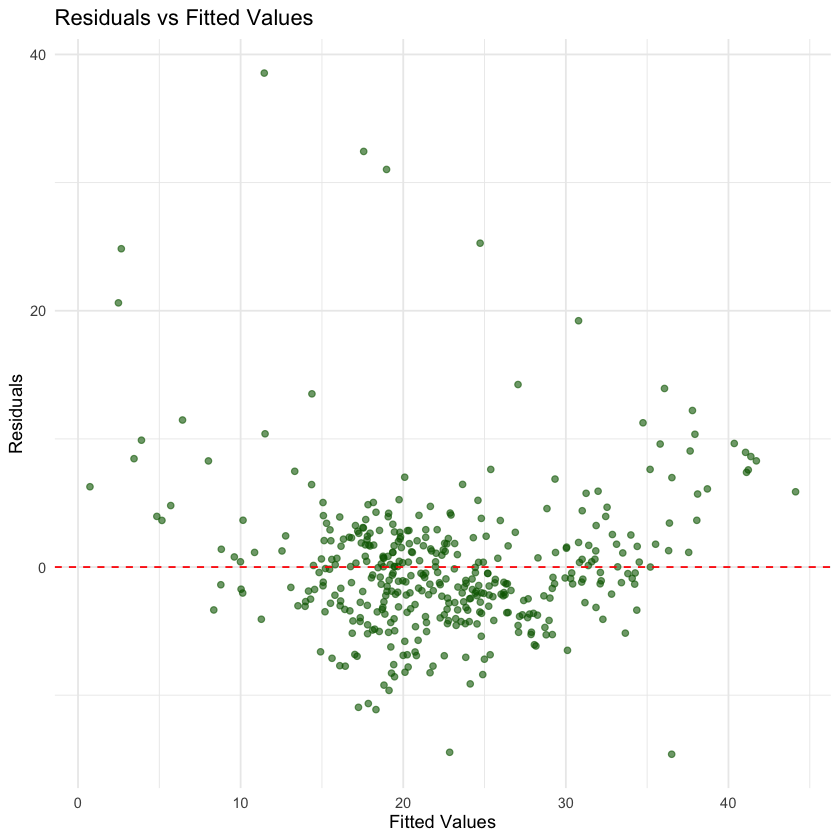

In [80]:
# Create residuals plot to check model fit
residuals_df <- data.frame(Fitted = predict(h_lin_step_model), Residuals = residuals(h_lin_step_model))
ggplot(residuals_df, aes(x = Fitted, y = Residuals)) +
  geom_point(color = 'darkgreen', alpha = 0.6) +
  geom_hline(yintercept = 0, color = 'red', linetype = 'dashed') +
  labs(title = "Residuals vs Fitted Values",
       x = "Fitted Values",
       y = "Residuals") +
  theme_minimal()

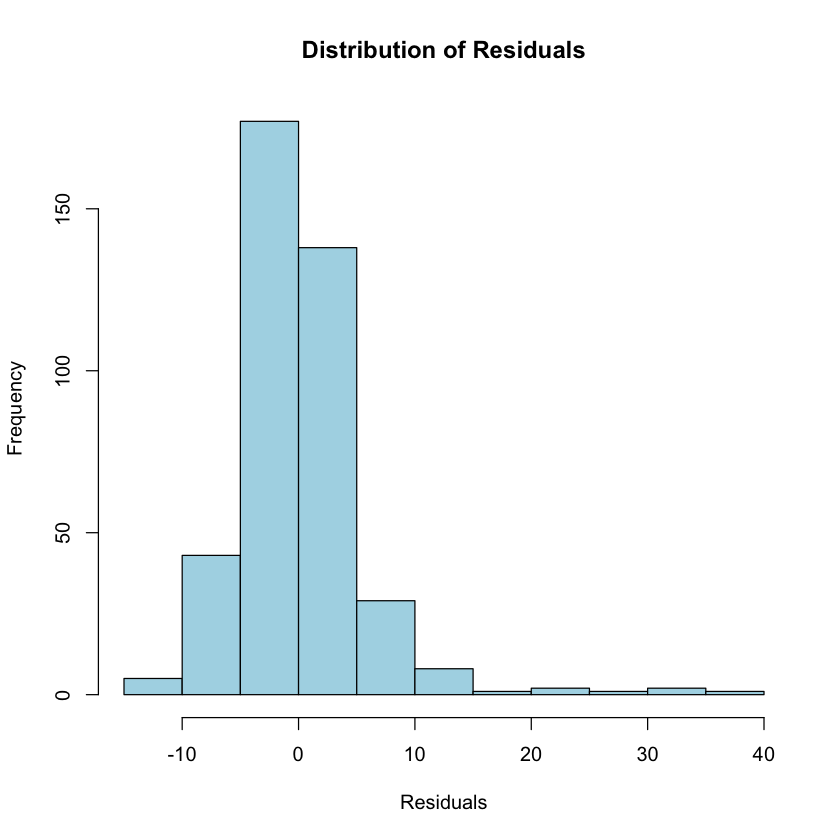

In [81]:
# Check distribution of residuals
hist(residuals(h_lin_step_model), main = "Distribution of Residuals",
     xlab = "Residuals", col = "lightblue")

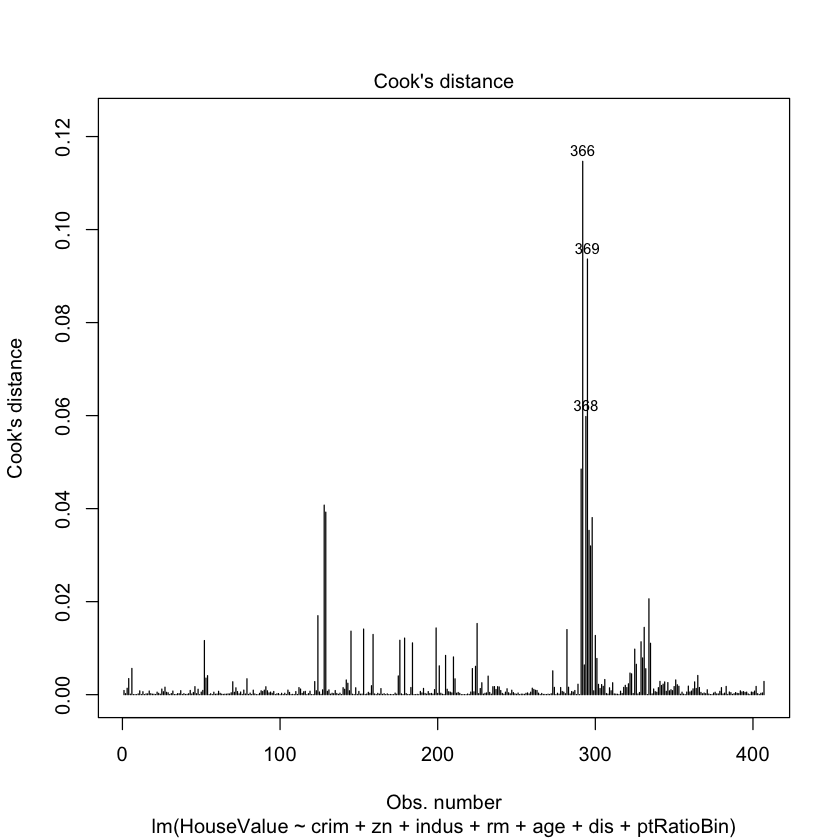

In [82]:
# Identify influential observations using Cook's distance
plot(h_lin_step_model, which = 4)
cooks_d <- cooks.distance(h_lin_step_model)
influential <- which(cooks_d > 4/nrow(data))

---

# Part 3: Binomial Logistic Regression

## 3.1 Overview

Logistic regression predicts **log odds** which can be converted to probabilities using exponential function.

### Interpreting Coefficients

**For continuous predictors (holding other variables constant):**
- For every 1-unit increase: log odds change by β
- `exp(β)` = odds ratio
  - If `exp(β) > 1`: Increased odds of being in category B
  - If `exp(β) < 1`: Decreased odds of being in category B
- Percentage change in odds: `(exp(β) - 1) × 100%`

**For categorical predictors:**
- Compared to reference category
- `exp(β) - 1` gives percentage change in odds
- Include z-values and p-values for significance testing

## 3.2 Binary Target Variable Creation

In [83]:
# Reload data and create binary outcome variable
set.seed(123)
housing_df <- read.csv("housing.csv", stringsAsFactors = TRUE)
housing_df$ptRatioBin <- as.factor(housing_df$ptRatioBin)

# Create binary target: 1 = High value (above median), 0 = Low value
median_value <- median(housing_df$HouseValue, na.rm = TRUE)
housing_df$HighValue <- ifelse(housing_df$HouseValue > median_value, 1, 0)
housing_df$HighValue <- as.factor(housing_df$HighValue)

# Remove original HouseValue to avoid data leakage
housing_df$HouseValue <- NULL

# Preview transformed data
head(housing_df)
tail(housing_df)

,crim,zn,indus,rm,age,dis,rad,NoxGroups,ptRatioBin,HighValue
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<fct>,<fct>
1,0.00632,18,2.31,6.575,65.2,4.0900,1,Medium,0,1
2,0.02731,0,7.07,6.421,78.9,4.9671,2,Low,0,1
3,0.02729,0,7.07,7.185,61.1,4.9671,2,Low,0,1
4,0.03237,0,2.18,6.998,45.8,6.0622,3,Low,0,1
5,0.06905,0,2.18,7.147,54.2,6.0622,3,Low,0,1
6,0.02985,0,2.18,6.430,58.7,6.0622,3,Low,0,1


,crim,zn,indus,rm,age,dis,rad,NoxGroups,ptRatioBin,HighValue
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<fct>,<fct>
501,0.22438,0,9.69,6.027,79.7,2.4982,6,Medium,0,0
502,0.06263,0,11.93,6.593,69.1,2.4786,1,Medium,1,1
503,0.04527,0,11.93,6.120,76.7,2.2875,1,Medium,1,0
504,0.06076,0,11.93,6.976,91.0,2.1675,1,Medium,1,1
505,0.10959,0,11.93,6.794,89.3,2.3889,1,Medium,1,1
506,0.04741,0,11.93,6.030,80.8,2.5050,1,Medium,1,0


### Class Distribution Analysis


  0   1 
256 250 


       0        1 
50.59289 49.40711 

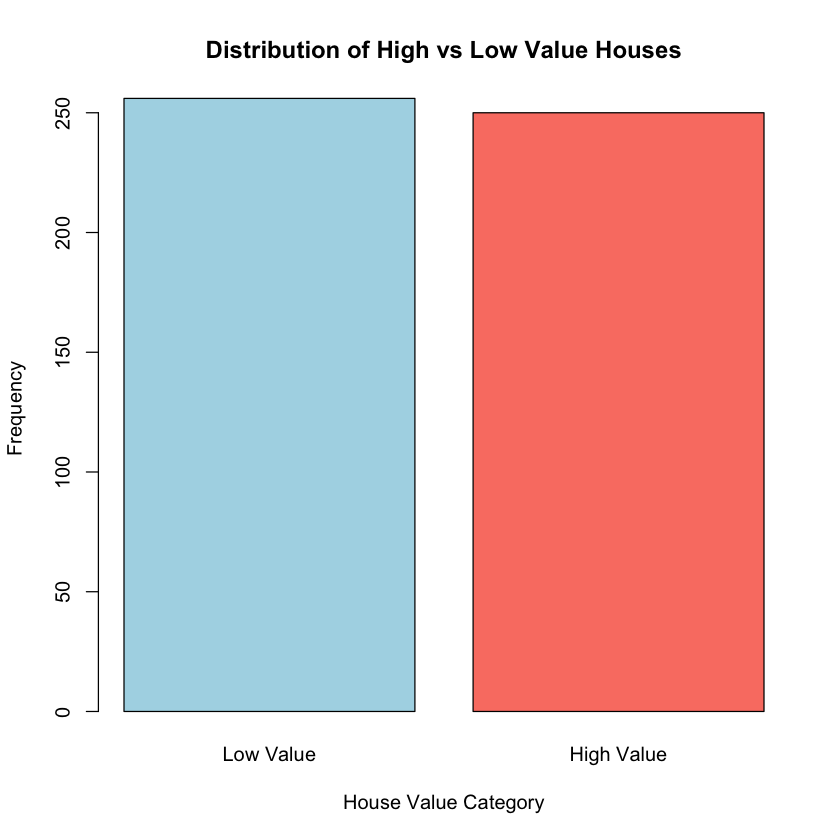

In [84]:
# Examine class balance in binary target variable
table(housing_df$HighValue)
prop.table(table(housing_df$HighValue)) * 100

# Visualize class distribution
barplot(table(housing_df$HighValue), 
        main = "Distribution of High vs Low Value Houses",
        xlab = "House Value Category", 
        ylab = "Frequency",
        col = c("lightblue", "salmon"),
        names.arg = c("Low Value", "High Value"))

# A tibble: 2 × 5
  HighValue mean_rm mean_crim mean_dis mean_indus
  <fct>       <dbl>     <dbl>    <dbl>      <dbl>
1 0            5.93     6.28      3.17      14.3 
2 1            6.65     0.883     4.44       7.87


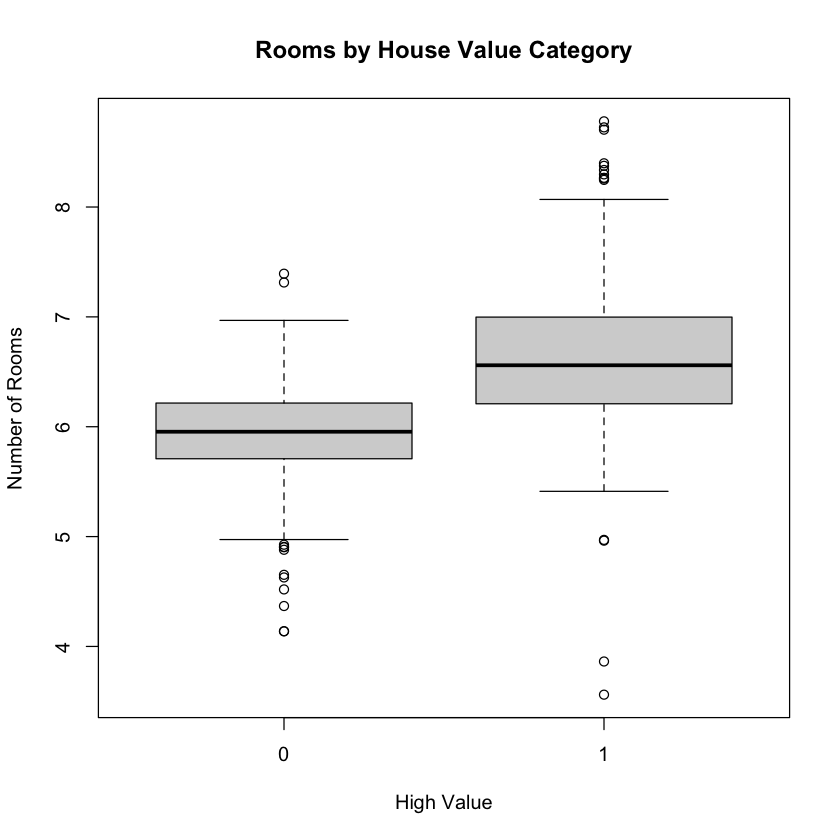

In [85]:
# Compare predictor means between high/low value groups
group_stats <- housing_df %>%
  group_by(HighValue) %>%
  summarise(
    mean_rm = mean(rm),
    mean_crim = mean(crim),
    mean_dis = mean(dis),
    mean_indus = mean(indus)
  )
print(group_stats)

# Visualize one key relationship
boxplot(rm ~ HighValue, data = housing_df, 
        main = "Rooms by House Value Category",
        xlab = "High Value", ylab = "Number of Rooms")

In [ ]:
# Test association between categorical predictors and outcome
chisq.test(table(housing_df$HighValue, housing_df$ptRatioBin))
chisq.test(table(housing_df$HighValue, housing_df$NoxGroups))

# Visualize categorical associations
library(ggplot2)
ggplot(housing_df, aes(x = ptRatioBin, fill = HighValue)) +
  geom_bar(position = "fill") +
  labs(title = "Proportion of High Value Houses by PT Ratio",
       y = "Proportion") +
  theme_minimal()

## 3.3 Train-Test Split for Classification

In [87]:
# Create 80/20 stratified split for binary classification
set.seed(123)
inTrain <- createDataPartition(housing_df$HighValue, p = 0.8, list = F)
train_h <- housing_df[inTrain,]
test_h <- housing_df[-inTrain,]

In [88]:
# Fit full logistic regression model
logistic_full_model <- glm(HighValue ~ ., 
                      data = train_h, family = binomial)
summary(logistic_full_model)


Call:
glm(formula = HighValue ~ ., family = binomial, data = train_h)

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -17.688145   3.287203  -5.381 7.41e-08 ***
crim             -0.357644   0.110992  -3.222 0.001272 ** 
zn               -0.003854   0.012748  -0.302 0.762435    
indus            -0.076104   0.045744  -1.664 0.096177 .  
rm                3.989912   0.540917   7.376 1.63e-13 ***
age              -0.049846   0.010929  -4.561 5.10e-06 ***
dis              -0.417049   0.168332  -2.478 0.013229 *  
rad               0.088629   0.041093   2.157 0.031020 *  
NoxGroupsLow     -0.954629   0.859875  -1.110 0.266915    
NoxGroupsMedium  -0.949507   0.621697  -1.527 0.126691    
ptRatioBin1      -1.631171   0.452516  -3.605 0.000313 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 561.39  on 404  degrees of freedom
Residual deviance: 248.50 

In [89]:
# Calculate odds ratios for significant predictors (p < 0.05)
significant_vars <- summary(logistic_full_model)$coefficients
significant_vars <- significant_vars[significant_vars[,4] < 0.05, ]
odds_ratios <- round(exp(significant_vars[,1]), digits = 4)
print("Odds Ratios for Significant Predictors:")
print(odds_ratios)

[1] "Odds Ratios for Significant Predictors:"


(Intercept)        crim          rm         age         dis         rad 
     0.0000      0.6993     54.0502      0.9514      0.6590      1.0927 
ptRatioBin1 
     0.1957 


In [90]:
# Test individual predictors and their interaction
model_zn_alone <- glm(HighValue ~ zn, data = train_h, family = binomial)
model_indus_alone <- glm(HighValue ~ indus, data = train_h, family = binomial)
model_zn_indus_inter <- glm(HighValue ~ zn * indus, data = train_h, family = binomial)

# Display summaries
print("\n--- Model: zn alone ---\n")
print(summary(model_zn_alone))
print("\n--- Model: indus alone ---\n")
print(summary(model_indus_alone))  
print("\n--- Model: zn * indus interaction ---\n")
print(summary(model_zn_indus_inter))

[1] "\n--- Model: zn alone ---\n"

Call:
glm(formula = HighValue ~ zn, family = binomial, data = train_h)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.391042   0.114430  -3.417 0.000632 ***
zn           0.040472   0.007274   5.564 2.64e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 561.39  on 404  degrees of freedom
Residual deviance: 509.00  on 403  degrees of freedom
AIC: 513

Number of Fisher Scoring iterations: 5

[1] "\n--- Model: indus alone ---\n"

Call:
glm(formula = HighValue ~ indus, family = binomial, data = train_h)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.84902    0.22552   8.199 2.42e-16 ***
indus       -0.17360    0.01868  -9.293  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 56

In [91]:
# Perform stepwise selection using BIC
step_logistic_model <- step(logistic_full_model, k = log(nrow(train_h)))
summary(step_logistic_model)

Start:  AIC=314.54
HighValue ~ crim + zn + indus + rm + age + dis + rad + NoxGroups + 
    ptRatioBin

             Df Deviance    AIC
- NoxGroups   2   250.93 304.97
- zn          1   248.59 308.63
- indus       1   251.48 311.52
- rad         1   253.38 313.41
<none>            248.50 314.54
- dis         1   254.98 315.02
- ptRatioBin  1   262.61 322.65
- crim        1   263.53 323.57
- age         1   273.87 333.91
- rm          1   357.36 417.40

Step:  AIC=304.97
HighValue ~ crim + zn + indus + rm + age + dis + rad + ptRatioBin

             Df Deviance    AIC
- zn          1   250.94 298.97
- indus       1   252.39 300.42
- rad         1   255.83 303.86
<none>            250.93 304.97
- dis         1   259.45 307.48
- crim        1   264.02 312.05
- ptRatioBin  1   267.01 315.04
- age         1   276.98 325.01
- rm          1   363.79 411.82

Step:  AIC=298.97
HighValue ~ crim + indus + rm + age + dis + rad + ptRatioBin

             Df Deviance    AIC
- indus       1   252.39 2


Call:
glm(formula = HighValue ~ crim + rm + age + dis + ptRatioBin, 
    family = binomial, data = train_h)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -19.20319    2.95072  -6.508 7.62e-11 ***
crim         -0.17659    0.05895  -2.995 0.002740 ** 
rm            4.02379    0.50566   7.958 1.75e-15 ***
age          -0.05043    0.01002  -5.032 4.86e-07 ***
dis          -0.39545    0.12164  -3.251 0.001150 ** 
ptRatioBin1  -1.36711    0.37411  -3.654 0.000258 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 561.39  on 404  degrees of freedom
Residual deviance: 256.45  on 399  degrees of freedom
AIC: 268.45

Number of Fisher Scoring iterations: 7


In [92]:
# Calculate odds ratios for final model's significant predictors
significant_vars <- summary(step_logistic_model)$coefficients
significant_vars <- significant_vars[significant_vars[,4] < 0.05, ]
odds_ratios <- round(exp(significant_vars[,1]), digits = 4)
print("Odds Ratios for Significant Predictors:")
print(odds_ratios)

[1] "Odds Ratios for Significant Predictors:"


(Intercept)        crim          rm         age         dis ptRatioBin1 
     0.0000      0.8381     55.9124      0.9508      0.6734      0.2548 


In [93]:
# BIC comparison for logistic regression models

final_formula <- formula(step_logistic_model)
print("Final Model Formula:")
print(final_formula)

# Define models at different steps
model_log_0 <- glm(HighValue ~ ., 
                   data = train_h, 
                   family = binomial)

model_log_1 <- glm(HighValue ~ crim + zn + indus + rm + age + dis + rad + ptRatioBin, 
                   data = train_h, 
                   family = binomial)

model_log_2 <- glm(HighValue ~crim + indus + rm + age + dis + rad + ptRatioBin, 
                   data = train_h, 
                   family = binomial)

model_log_final <- step_logistic_model

# Calculate BIC values
bic_log_0 <- BIC(model_log_0)
bic_log_1 <- BIC(model_log_1)
bic_log_2 <- BIC(model_log_2)
bic_log_final <- BIC(model_log_final)

# Create comparison table
logistic_model_comparison <- data.frame(
  Model = c("Full Model", "Step 1", "Step 2", "Final Model"),
  BIC = c(bic_log_0, bic_log_1, bic_log_2, bic_log_final),
  NumPredictors = c(
    length(coef(model_log_0)) - 1,
    length(coef(model_log_1)) - 1,
    length(coef(model_log_2)) - 1,
    length(coef(model_log_final)) - 1
  )
)

print("BIC Comparison Table (Logistic Regression):")
print(logistic_model_comparison)

# Calculate Bayes Factors
print("\n--- Bayes Factor Analysis ---")

bf_0_vs_1 <- exp((bic_log_0 - bic_log_1)/2)
print(paste("BF (Full vs Step1):", round(bf_0_vs_1, 2)))
print(paste("Step1 is", round(bf_0_vs_1, 2), "times more likely than Full model"))

bf_1_vs_2 <- exp((bic_log_1 - bic_log_2)/2)
print(paste("\nBF (Step1 vs Step2):", round(bf_1_vs_2, 2)))
print(paste("Step2 is", round(bf_1_vs_2, 2), "times more likely than Step1"))

bf_2_vs_final <- exp((bic_log_2 - bic_log_final)/2)
print(paste("\nBF (Step2 vs Final):", round(bf_2_vs_final, 2)))
print(paste("Final is", round(bf_2_vs_final, 2), "times more likely than Step2"))

bf_0_vs_final <- exp((bic_log_0 - bic_log_final)/2)
print(paste("\nBF (Full model vs Final):", round(bf_0_vs_final, 2)))
print(paste("Final is", round(bf_0_vs_final, 2), "times more likely than Full model"))

# Calculate McFadden's Pseudo R² for model fit assessment
null_model <- glm(HighValue ~ 1, data = train_h, family = binomial)

pseudoR2_0 <- 1 - (logLik(model_log_0) / logLik(null_model))
pseudoR2_1 <- 1 - (logLik(model_log_1) / logLik(null_model))
pseudoR2_2 <- 1 - (logLik(model_log_2) / logLik(null_model))
pseudoR2_final <- 1 - (logLik(model_log_final) / logLik(null_model))

logistic_model_comparison$McFadden_PseudoR2 <- c(
  pseudoR2_0, pseudoR2_1, pseudoR2_2, pseudoR2_final
)

print("\nUpdated Comparison Table with McFadden's Pseudo R²:")
print(logistic_model_comparison)

[1] "Final Model Formula:"
HighValue ~ crim + rm + age + dis + ptRatioBin
[1] "BIC Comparison Table (Logistic Regression):"
        Model      BIC NumPredictors
1  Full Model 314.5435            10
2      Step 1 304.9677             8
3      Step 2 298.9725             7
4 Final Model 292.4773             5
[1] "\n--- Bayes Factor Analysis ---"
[1] "BF (Full vs Step1): 120.05"
[1] "Step1 is 120.05 times more likely than Full model"
[1] "\nBF (Step1 vs Step2): 20.04"
[1] "Step2 is 20.04 times more likely than Step1"
[1] "\nBF (Step2 vs Final): 25.73"
[1] "Final is 25.73 times more likely than Step2"
[1] "\nBF (Full model vs Final): 61889.87"
[1] "Final is 61889.87 times more likely than Full model"
[1] "\nUpdated Comparison Table with McFadden's Pseudo R²:"
        Model      BIC NumPredictors McFadden_PseudoR2
1  Full Model 314.5435            10         0.5573454
2      Step 1 304.9677             8         0.5530133
3      Step 2 298.9725             7         0.5529978
4 Final Model

## 3.4 Model Evaluation

In [94]:
# Generate predictions on test data (probabilities and classes)
logistic_predictions_prob <- predict(step_logistic_model, newdata = test_h, type = "response")
logistic_predictions <- ifelse(logistic_predictions_prob > 0.71, 1, 0)

# Evaluate using confusion matrix
confusion_mat <- confusionMatrix(as.factor(logistic_predictions), as.factor(test_h$HighValue), positive = "1")
print("Confusion Matrix:")
print(confusion_mat)

[1] "Confusion Matrix:"
Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 51 16
         1  0 34
                                          
               Accuracy : 0.8416          
                 95% CI : (0.7555, 0.9067)
    No Information Rate : 0.505           
    P-Value [Acc > NIR] : 1.528e-12       
                                          
                  Kappa : 0.6821          
                                          
 Mcnemar's Test P-Value : 0.0001768       
                                          
            Sensitivity : 0.6800          
            Specificity : 1.0000          
         Pos Pred Value : 1.0000          
         Neg Pred Value : 0.7612          
             Prevalence : 0.4950          
         Detection Rate : 0.3366          
   Detection Prevalence : 0.3366          
      Balanced Accuracy : 0.8400          
                                          
       'Positive' Class : 1               
            

In [95]:
# Function to create visual confusion matrix
plot_confusion_matrix <- function(cm) {
  # Extract confusion matrix table
  cm_table <- cm$table
  
  # Convert to data frame for ggplot
  cm_df <- as.data.frame(as.table(cm_table))
  colnames(cm_df) <- c("Predicted", "Reference", "Frequency")
  
  # Create data frame with labels and formatting
  cm_matrix <- data.frame(
    Predicted = c("0", "0", "1", "1"),
    Reference = c("0", "1", "0", "1"),
    Frequency = c(cm_table[1,1], cm_table[1,2], cm_table[2,1], cm_table[2,2]),
    Label = c("TN", "FN", "FP", "TP"),
    Color = c("green", "red", "red", "green"),
    stringsAsFactors = FALSE
  )
  
  # Create visualization
  plot <- ggplot(cm_matrix, aes(x = Predicted, y = Reference, fill = Color)) +
    geom_tile(color = "black", size = 1) +
    geom_text(aes(label = paste(Label, "\n", Frequency)), 
              size = 6, fontface = "bold", color = "black") +
    scale_fill_manual(values = c("green" = "#90EE90", "red" = "#FFB6C6")) +
    scale_x_discrete(limits = c("0", "1"), labels = c("Negative", "Positive")) +
    scale_y_discrete(limits = c("1", "0"), labels = c("Positive", "Negative")) +
    labs(
      title = "Confusion Matrix",
      x = "Predicted Value",
      y = "Actual Value",
      fill = "Classification"
    ) +
    theme_minimal() +
    theme(
      axis.text = element_text(size = 12, face = "bold"),
      axis.title = element_text(size = 13, face = "bold"),
      plot.title = element_text(size = 14, face = "bold", hjust = 0.5),
      legend.position = "none",
      panel.grid = element_blank()
    )
  
  return(plot)
}

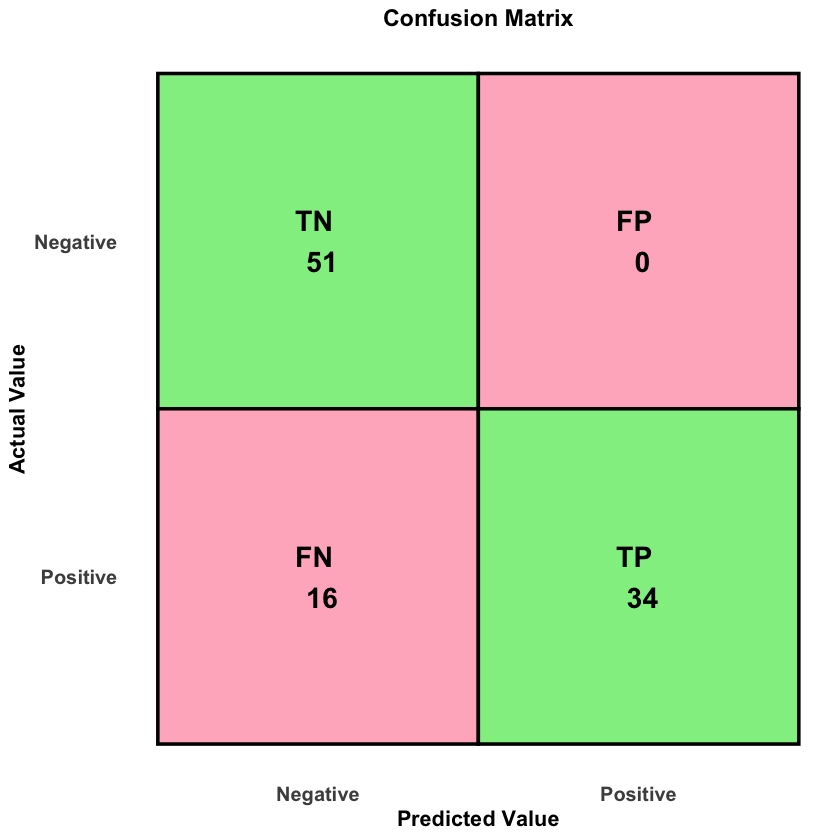

In [96]:
# Display visual confusion matrix
plot_confusion_matrix(confusion_mat)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC: 0.8525"


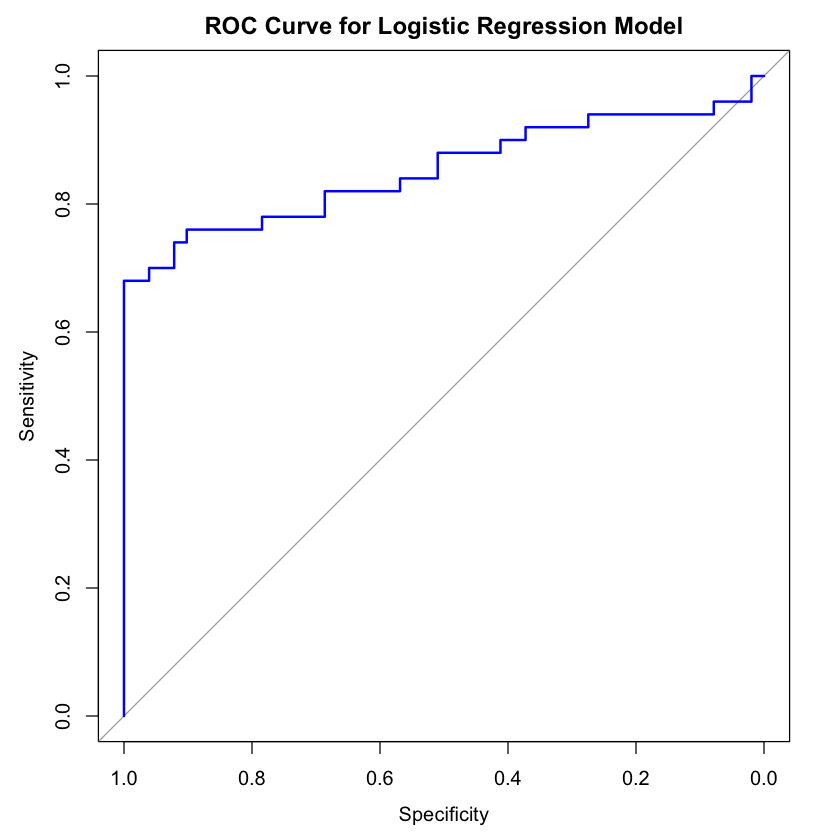

In [97]:
# Generate and plot ROC curve
roc_curve <- roc(test_h$HighValue, logistic_predictions_prob)
code
r
# Combined script preview and run instruction
combined_path <- 'project/section2/house_value_analysis_combined.R'
if (file.exists(combined_path)) {
  cat('Combined script found at:', combined_path, '\n\n')
  cat('Preview (first 200 lines):\n')
  lines <- readLines(combined_path, warn = FALSE)
  cat(paste(head(lines, 200), collapse = '\n'), '\n')
  cat('\nTo run the combined script in this R session:')
  cat('\nsource(
)\n', sep = '')
} else {
  cat('Combined script not found. Run the 
 cell to create it, then re-run this cell.\n')
}

plot(roc_curve, main = "ROC Curve for Logistic Regression Model", col = "blue", lwd = 2)
auc_value <- auc(roc_curve)
print(paste("AUC:", round(auc_value, 4)))

In [98]:
# Calculate optimal cutoff point using pROC
roc_obj <- roc(test_h$HighValue, logistic_predictions_prob)
best_coords <- coords(roc_obj, "best", ret = "threshold", transpose = FALSE)

print("Best Cutoff Point:")
print(best_coords)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "Best Cutoff Point:"


  threshold
1 0.7101278


[1] "Precision-Recall-F1 at Different Thresholds:"
                Threshold Precision Recall  F1_Score
Pos Pred Value        0.1 0.5945946   0.88 0.7096774
Pos Pred Value1       0.2 0.6363636   0.84 0.7241379
Pos Pred Value2       0.3 0.7192982   0.82 0.7663551
Pos Pred Value3       0.4 0.7800000   0.78 0.7800000
Pos Pred Value4       0.5 0.8636364   0.76 0.8085106
Pos Pred Value5       0.6 0.9459459   0.70 0.8045977
Pos Pred Value6       0.7 1.0000000   0.68 0.8095238
Pos Pred Value7       0.8 1.0000000   0.54 0.7012987
Pos Pred Value8       0.9 1.0000000   0.42 0.5915493


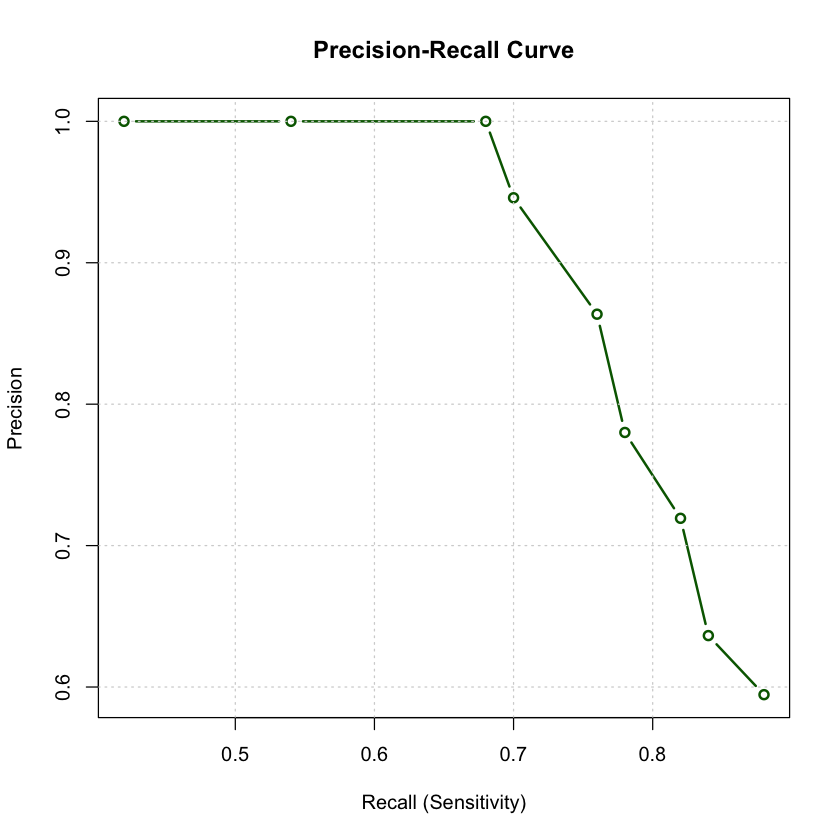

In [99]:
# Evaluate model at different probability thresholds
thresholds <- seq(0.1, 0.9, 0.1)
pr_data <- data.frame(
  Threshold = numeric(),
  Precision = numeric(),
  Recall = numeric(),
  F1_Score = numeric()
)

# Calculate metrics at each threshold
for (thresh in thresholds) {
  pred_class <- ifelse(logistic_predictions_prob > thresh, "1", "0")
  cm <- confusionMatrix(as.factor(pred_class), as.factor(test_h$HighValue), positive = "1")
  
  precision <- cm$byClass["Pos Pred Value"]
  recall <- cm$byClass["Sensitivity"]
  f1 <- 2 * (precision * recall) / (precision + recall)
  
  pr_data <- rbind(pr_data, data.frame(
    Threshold = thresh,
    Precision = precision,
    Recall = recall,
    F1_Score = f1
  ))
}

print("Precision-Recall-F1 at Different Thresholds:")
print(pr_data)

# Plot Precision-Recall curve
plot(pr_data$Recall, pr_data$Precision, 
     type = "b", col = "darkgreen", lwd = 2,
     main = "Precision-Recall Curve",
     xlab = "Recall (Sensitivity)", ylab = "Precision")
grid()

---

# Part 4: Decision Trees & Random Forests

**Analysis approach:**
- Simple decision trees (no cross-validation)
- Cross-validated decision trees
- Simple random forests
- Tuned random forests with cross-validation
- Compare all models using unified metrics

In [100]:
# Verify data dimensions and structure
dim(train_h)
dim(test_h)
head(train_h)

[1] 405  10

[1] 101  10

,crim,zn,indus,rm,age,dis,rad,NoxGroups,ptRatioBin,HighValue
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<fct>,<fct>
2,0.02731,0.0,7.07,6.421,78.9,4.9671,2,Low,0,1
3,0.02729,0.0,7.07,7.185,61.1,4.9671,2,Low,0,1
4,0.03237,0.0,2.18,6.998,45.8,6.0622,3,Low,0,1
5,0.06905,0.0,2.18,7.147,54.2,6.0622,3,Low,0,1
6,0.02985,0.0,2.18,6.430,58.7,6.0622,3,Low,0,1
7,0.08829,12.5,7.87,6.012,66.6,5.5605,5,Medium,0,1


In [101]:
tail(test_h)

,crim,zn,indus,rm,age,dis,rad,NoxGroups,ptRatioBin,HighValue
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<fct>,<fct>
476,6.39312,0,18.10,6.162,97.4,2.2060,24,Medium,1,0
477,4.87141,0,18.10,6.484,93.6,2.3053,24,High,1,0
484,2.81838,0,18.10,5.762,40.3,4.0983,24,Medium,1,1
494,0.17331,0,9.69,5.707,54.0,2.3817,6,Medium,0,1
496,0.17899,0,9.69,5.670,28.8,2.7986,6,Medium,0,1
501,0.22438,0,9.69,6.027,79.7,2.4982,6,Medium,0,0


In [102]:
# Verify no data leakage between train and test sets
cat("Train dimensions:", dim(train_h), "\n")
cat("Test dimensions:", dim(test_h), "\n")
cat("Total rows:", dim(train_h)[1] + dim(test_h)[1], "\n")

# Check for unique rows
cat("\nRows in train_h:", length(unique(rownames(train_h))), "\n")
cat("Rows in test_h:", length(unique(rownames(test_h))), "\n")

# Verify no overlap between datasets
overlap <- intersect(rownames(train_h), rownames(test_h))
if (length(overlap) == 0) {
  cat("✓ GOOD: No data leakage - datasets are properly split\n")
} else {
  cat("✗ ERROR: Overlap detected:", overlap, "\n")
}

Train dimensions: 405 10 
Test dimensions: 101 10 


Total rows: 506 

Rows in train_h: 405 
Rows in test_h: 101 
✓ GOOD: No data leakage - datasets are properly split



=== SIMPLE DECISION TREE (No Cross-Validation) ===

Call:
rpart(formula = HighValue ~ ., data = train_h, method = "class")
  n= 405 

      CP nsplit rel error xerror       xstd
1 0.5500      0     1.000  1.095 0.05014424
2 0.0850      1     0.450  0.505 0.04353514
3 0.0475      2     0.365  0.395 0.03987171
4 0.0125      4     0.270  0.345 0.03783003
5 0.0100      7     0.230  0.350 0.03804643

Variable importance
        rm       crim      indus        age        dis        rad         zn 
        25         17         15         12          9          8          7 
 NoxGroups ptRatioBin 
         6          2 

Node number 1: 405 observations,    complexity param=0.55
  predicted class=0  expected loss=0.4938272  P(node) =1
    class counts:   205   200
   probabilities: 0.506 0.494 
  left son=2 (237 obs) right son=3 (168 obs)
  Primary splits:
      rm         < 6.353    to the left,  improve=63.88188, (0 missing)
      indus      < 8.005    to the right, improve=56.63746, (0 mis

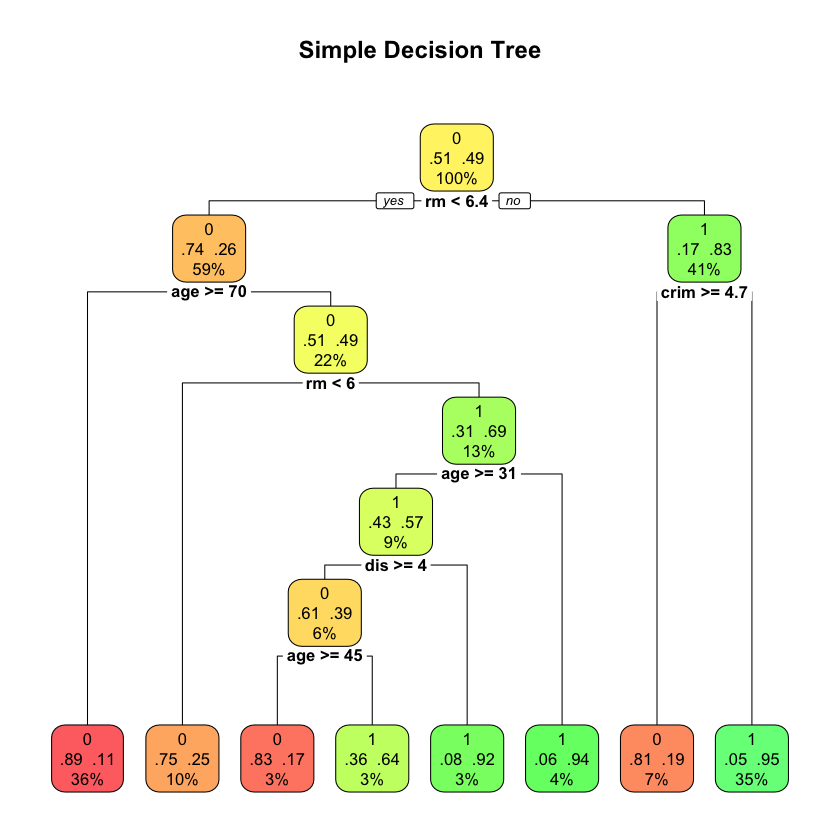

In [103]:
set.seed(123)

## Model 1: Simple Decision Tree (No Cross-Validation)

cat("\n=== SIMPLE DECISION TREE (No Cross-Validation) ===\n\n")

# Fit basic decision tree
h_dtree_simple <- rpart(
  HighValue ~ ., 
  data = train_h, 
  method = "class"
)

summary(h_dtree_simple)

# Visualize tree structure
rpart.plot(h_dtree_simple, 
           main = "Simple Decision Tree",
           extra = 104,
           box.palette = "RdYlGn")

# Generate predictions
dtree_tuned_pred_prob <- predict(h_dtree_simple, test_h, type = "prob")
dtree_simple_pred_class <- ifelse(dtree_tuned_pred_prob[, 2] > 0.5, "1", "0")

# Evaluate performance
cat("\n--- Confusion Matrix (Simple Tree) ---\n")
dtree_simple_cm <- confusionMatrix(as.factor(dtree_simple_pred_class), test_h$HighValue, positive = "1")
print(dtree_simple_cm)

cat("\nAccuracy:", round(dtree_simple_cm$overall["Accuracy"], 4), "\n")

n= 405 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 405 200 0 (0.50617284 0.49382716)  
   2) rm< 6.353 237  61 0 (0.74261603 0.25738397)  
     4) age>=70.15 146  16 0 (0.89041096 0.10958904) *
     5) age< 70.15 91  45 0 (0.50549451 0.49450549)  
      10) rm< 5.955 40  10 0 (0.75000000 0.25000000) *
      11) rm>=5.955 51  16 1 (0.31372549 0.68627451)  
        22) age>=31.4 35  15 1 (0.42857143 0.57142857)  
          44) dis>=3.96855 23   9 0 (0.60869565 0.39130435)  
            88) age>=45.4 12   2 0 (0.83333333 0.16666667) *
            89) age< 45.4 11   4 1 (0.36363636 0.63636364) *
          45) dis< 3.96855 12   1 1 (0.08333333 0.91666667) *
        23) age< 31.4 16   1 1 (0.06250000 0.93750000) *
   3) rm>=6.353 168  29 1 (0.17261905 0.82738095)  
     6) crim>=4.69963 27   5 0 (0.81481481 0.18518519) *
     7) crim< 4.69963 141   7 1 (0.04964539 0.95035461) *


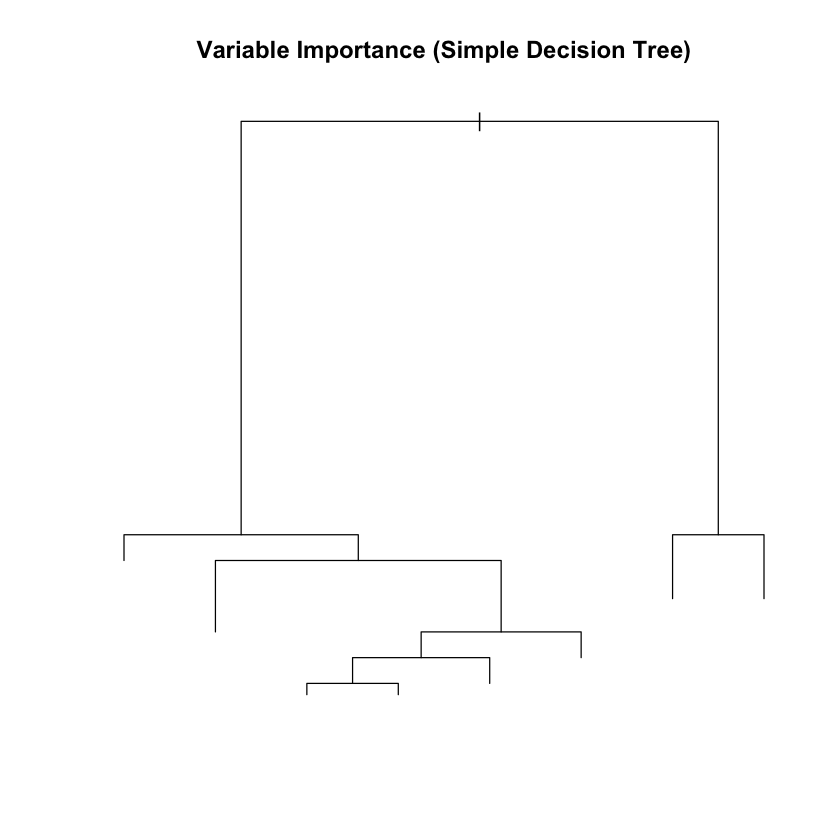

In [104]:
# Display variable importance and tree details
rf_importance <- varImp(h_dtree_simple)
print(h_dtree_simple)
plot(h_dtree_simple, main = "Variable Importance (Simple Decision Tree)")

CART 

405 samples
  9 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 364, 364, 365, 365, 364, 365, ... 
Resampling results across tuning parameters:

  cp      Accuracy   Kappa    
  0.0475  0.8022561  0.6033564
  0.0850  0.7431707  0.4855709
  0.5500  0.6094512  0.2136081

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.0475.

Best CP: 0.0475 

--- Confusion Matrix (CV Tree) ---
Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 48 24
         1  3 26
                                          
               Accuracy : 0.7327          
                 95% CI : (0.6354, 0.8159)
    No Information Rate : 0.505           
    P-Value [Acc > NIR] : 2.546e-06       
                                          
                  Kappa : 0.4631          
                                          
 Mcnemar's Test P-Value : 0.00

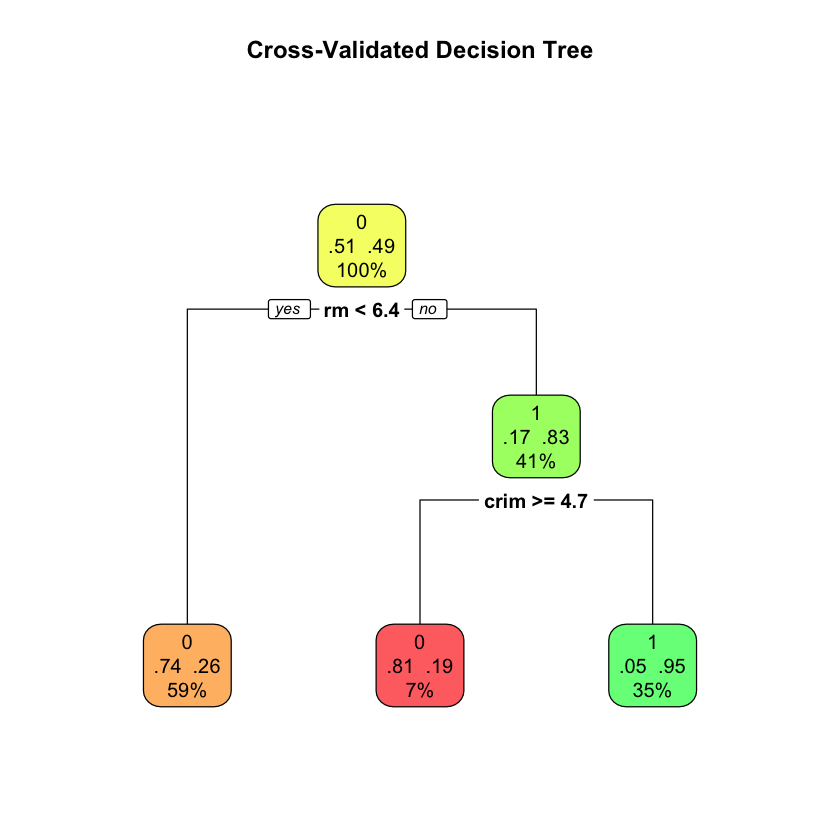

In [105]:
set.seed(123)

## Model 2: Cross-Validated Decision Tree

# Configure 10-fold cross-validation
ctrl <- trainControl(
  method = "cv",
  number = 10
)

# Train model with hyperparameter tuning
h_dtree_tuned <- train(
  HighValue ~ ., 
  data = train_h, 
  method = "rpart",
  trControl = ctrl
)

# Display tuning results
print(h_dtree_tuned)
cat("\nBest CP:", h_dtree_tuned$bestTune$cp, "\n")

# Visualize final tree
rpart.plot(h_dtree_tuned$finalModel, 
           main = "Cross-Validated Decision Tree",
           extra = 104,
           box.palette = "RdYlGn")

# Make predictions on test set
dtree_tuned_pred_prob <- predict(h_dtree_tuned, test_h, type = "prob")
dtree_tuned_pred_class <- ifelse(dtree_tuned_pred_prob[, 2] > 0.5, "1", "0")

# Evaluate performance
cat("\n--- Confusion Matrix (CV Tree) ---\n")
dtree_tuned_cm <- confusionMatrix(as.factor(dtree_tuned_pred_class), as.factor(test_h$HighValue), positive = "1")
print(dtree_tuned_cm)

cat("\nAccuracy:", round(dtree_tuned_cm$overall["Accuracy"], 4), "\n")


=== RANDOM FOREST (No Cross-Validation) ===


Call:
 randomForest(formula = HighValue ~ ., data = train_h, ntree = 500,      importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 13.58%
Confusion matrix:
    0   1 class.error
0 184  21    0.102439
1  34 166    0.170000

--- Confusion Matrix (Simple Random Forest) ---
Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 49 19
         1  2 31
                                          
               Accuracy : 0.7921          
                 95% CI : (0.6999, 0.8664)
    No Information Rate : 0.505           
    P-Value [Acc > NIR] : 2.449e-09       
                                          
                  Kappa : 0.5827          
                                          
 Mcnemar's Test P-Value : 0.0004803       
                                          
       

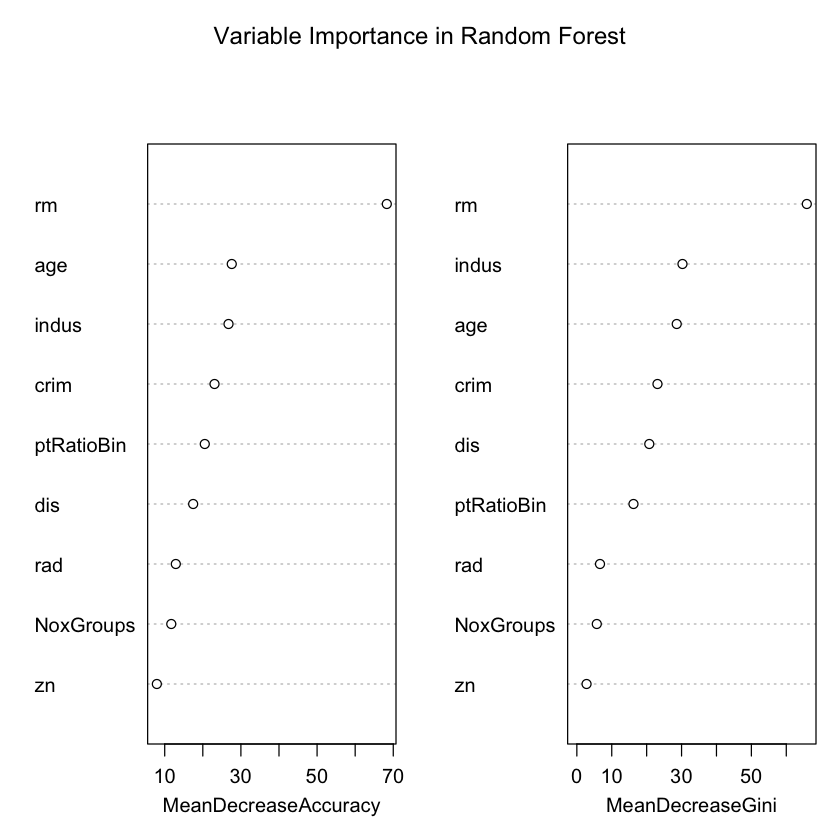

In [106]:
set.seed(123)

## Model 3: Simple Random Forest (No Cross-Validation)

cat("\n=== RANDOM FOREST (No Cross-Validation) ===\n\n")

# Train random forest with default parameters
h_rf_simple <- randomForest(
  HighValue ~ ., 
  data = train_h,
  ntree = 500,           
  importance = TRUE      
)

# Display model summary
print(h_rf_simple)

# Plot variable importance
varImpPlot(h_rf_simple, 
           main = "Variable Importance in Random Forest")

# Generate predictions
rf_simple_pred_prob <- predict(h_rf_simple, test_h, type = "prob")
rf_simple_pred_class <- ifelse(rf_simple_pred_prob[, 2] > 0.71, "1", "0")

# Evaluate performance
cat("\n--- Confusion Matrix (Simple Random Forest) ---\n")
rf_simple_cm <- confusionMatrix(as.factor(rf_simple_pred_class), test_h$HighValue, positive = "1")
print(rf_simple_cm)

cat("\nAccuracy:", round(rf_simple_cm$overall["Accuracy"], 4), "\n")



=== RANDOM FOREST (With Cross-Validation) ===



Random Forest 

405 samples
  9 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 364, 364, 365, 365, 364, 365, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  2     0.8665244  0.7328416
  3     0.8516463  0.7030910
  4     0.8467683  0.6934674
  5     0.8392683  0.6784452
  6     0.8442683  0.6884795

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.

Best mtry: 2 
rf variable importance

                Overall
rm              100.000
indus            43.150
age              41.893
crim             37.214
dis              34.238
ptRatioBin1      25.499
rad              12.927
NoxGroupsLow      9.293
zn                5.527
NoxGroupsMedium   0.000


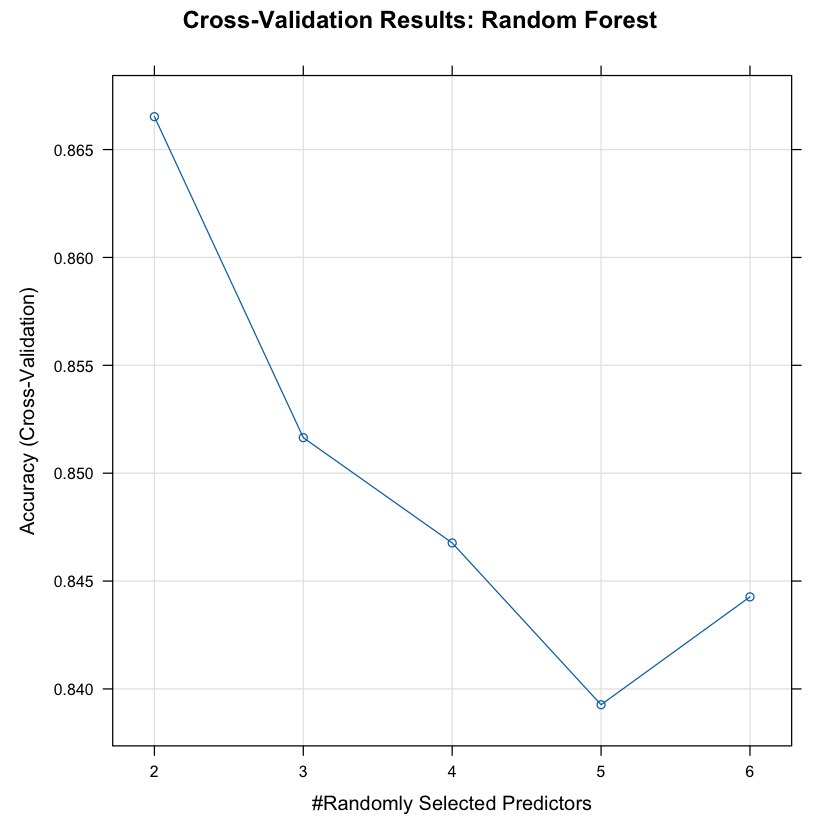


--- Confusion Matrix (Tuned Random Forest) ---
Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 51 19
         1  0 31
                                          
               Accuracy : 0.8119          
                 95% CI : (0.7219, 0.8828)
    No Information Rate : 0.505           
    P-Value [Acc > NIR] : 1.549e-10       
                                          
                  Kappa : 0.6223          
                                          
 Mcnemar's Test P-Value : 3.636e-05       
                                          
            Sensitivity : 0.6200          
            Specificity : 1.0000          
         Pos Pred Value : 1.0000          
         Neg Pred Value : 0.7286          
             Prevalence : 0.4950          
         Detection Rate : 0.3069          
   Detection Prevalence : 0.3069          
      Balanced Accuracy : 0.8100          
                                          
       'Positive' Class : 1    

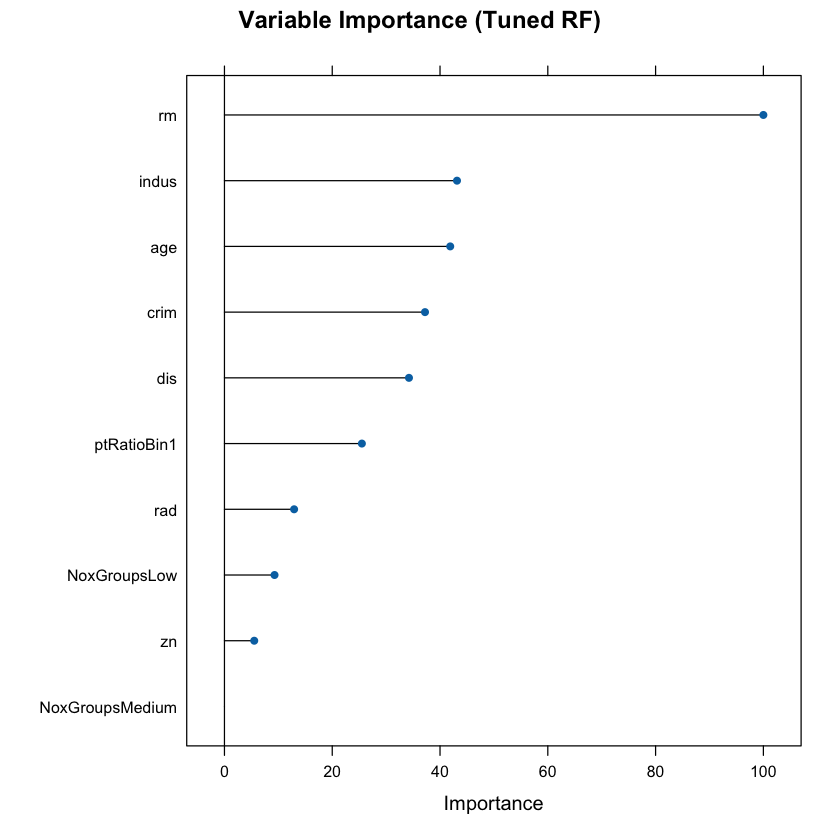

In [107]:
set.seed(123)

## Model 4: Tuned Random Forest with Cross-Validation

cat("\n\n=== RANDOM FOREST (With Cross-Validation) ===\n\n")

# Configure cross-validation
ctrl_rf <- trainControl(
  method = "cv",
  number = 10
)

# Train with hyperparameter tuning (mtry values)
h_rf_tuned <- train(
  HighValue ~ ., 
  data = train_h, 
  method = "rf",
  trControl = ctrl_rf,
  tuneGrid = expand.grid(mtry = c(2, 3, 4, 5, 6)), 
  ntree = 500
)

# Display tuning results
print(h_rf_tuned)
cat("\nBest mtry:", h_rf_tuned$bestTune$mtry, "\n")

# Plot cross-validation results
plot(h_rf_tuned, main = "Cross-Validation Results: Random Forest")

# Extract variable importance
rf_importance <- varImp(h_rf_tuned)
print(rf_importance)
plot(rf_importance, main = "Variable Importance (Tuned RF)")

# Make predictions
rf_tuned_pred_prob <- predict(h_rf_tuned, test_h, type = "prob")
rf_tuned_pred_class <- ifelse(rf_tuned_pred_prob[, 2] > 0.71, "1", "0")

# Evaluate performance
cat("\n--- Confusion Matrix (Tuned Random Forest) ---\n")
rf_tuned_cm <- confusionMatrix(as.factor(rf_tuned_pred_class), test_h$HighValue, positive = "1")
print(rf_tuned_cm)

cat("\nAccuracy:", round(rf_tuned_cm$overall["Accuracy"], 4), "\n")

In [108]:
summary(h_rf_tuned)

                Length Class      Mode     
call               5   -none-     call     
type               1   -none-     character
predicted        405   factor     numeric  
err.rate        1500   -none-     numeric  
confusion          6   -none-     numeric  
votes            810   matrix     numeric  
oob.times        405   -none-     numeric  
classes            2   -none-     character
importance        10   -none-     numeric  
importanceSD       0   -none-     NULL     
localImportance    0   -none-     NULL     
proximity          0   -none-     NULL     
ntree              1   -none-     numeric  
mtry               1   -none-     numeric  
forest            14   -none-     list     
y                405   factor     numeric  
test               0   -none-     NULL     
inbag              0   -none-     NULL     
xNames            10   -none-     character
problemType        1   -none-     character
tuneValue          1   data.frame list     
obsLevels          2   -none-   


=== MODEL COMPARISON (CUTOFF = 0.71) ===

                           Model Accuracy Sensitivity Specificity Precision
Accuracy  Decision Tree (Simple)   0.7624        0.58      0.9412    0.9062
Accuracy1     Decision Tree (CV)   0.7327        0.52      0.9412    0.8966
Accuracy2 Random Forest (Simple)   0.7921        0.62      0.9608    0.9394
Accuracy3  Random Forest (Tuned)   0.8119        0.62      1.0000    1.0000
          Recall F1_Score
Accuracy    0.58   0.7073
Accuracy1   0.52   0.6582
Accuracy2   0.62   0.7470
Accuracy3   0.62   0.7654



=== PRECISION-RECALL CURVES ===



Warning message in confusionMatrix.default(as.factor(pred_class), as.factor(test_h$HighValue), :
“Levels are not in the same order for reference and data. Refactoring data to match.”
Warning message in confusionMatrix.default(as.factor(pred_class), as.factor(test_h$HighValue), :
“Levels are not in the same order for reference and data. Refactoring data to match.”
Warning message in confusionMatrix.default(as.factor(pred_class), as.factor(test_h$HighValue), :
“Levels are not in the same order for reference and data. Refactoring data to match.”


✓ Precision-Recall curves plotted


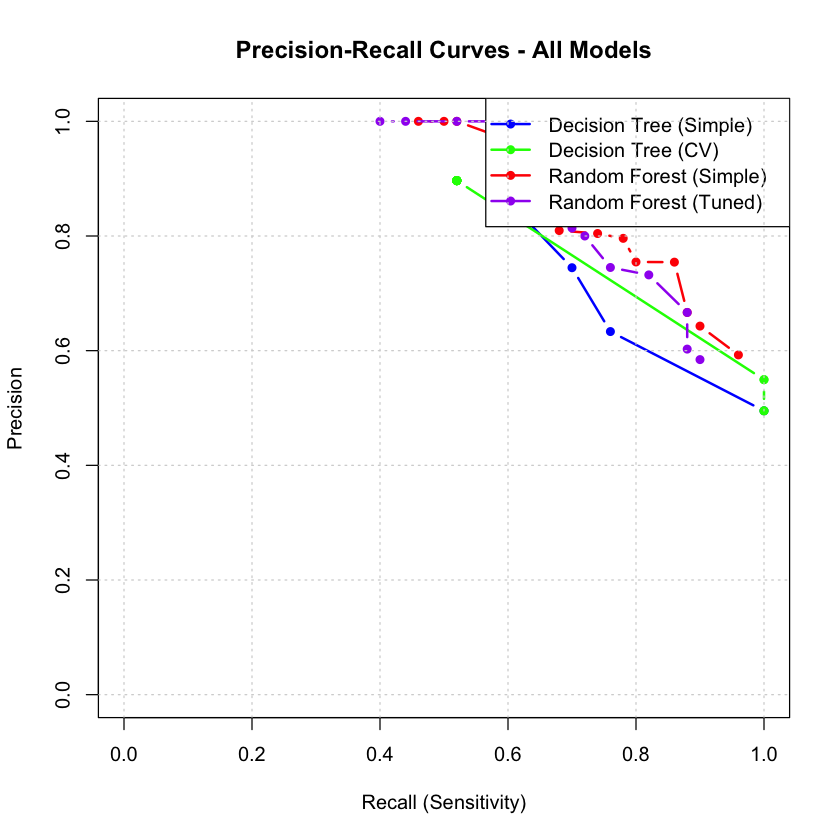

In [109]:


# Part 5: Unified Model Comparison

## 5.1 Performance Metrics at Cutoff = 0.71

# Function to calculate comprehensive metrics
calculate_metrics <- function(predictions, actual, model_name) {
  cm <- confusionMatrix(as.factor(predictions), as.factor(actual), positive = "1")
  
  accuracy <- cm$overall["Accuracy"]
  sensitivity <- cm$byClass["Sensitivity"]
  specificity <- cm$byClass["Specificity"]
  precision <- cm$byClass["Pos Pred Value"]
  recall <- cm$byClass["Sensitivity"]
  f1 <- 2 * (precision * recall) / (precision + recall)
  
  return(data.frame(
    Model = model_name,
    Accuracy = round(accuracy, 4),
    Sensitivity = round(sensitivity, 4),
    Specificity = round(specificity, 4),
    Precision = round(precision, 4),
    Recall = round(recall, 4),
    F1_Score = round(f1, 4)
  ))
}

# Collect predictions from all models
models_list <- list(
  list(name = "Decision Tree (Simple)", prob = predict(h_dtree_simple, test_h, type = "prob")[, 2]),
  list(name = "Decision Tree (CV)", prob = predict(h_dtree_tuned, test_h, type = "prob")[, 2]),
  list(name = "Random Forest (Simple)", prob = predict(h_rf_simple, test_h, type = "prob")[, 2]),
  list(name = "Random Forest (Tuned)", prob = predict(h_rf_tuned, test_h, type = "prob")[, 2])
)

# Calculate metrics at threshold 0.71
cat("\n=== MODEL COMPARISON (CUTOFF = 0.71) ===\n\n")

metrics_table <- data.frame()

for (model in models_list) {
  pred_class <- ifelse(model$prob > 0.71, "1", "0")
  metrics_table <- rbind(metrics_table, 
                         calculate_metrics(pred_class, test_h$HighValue, model$name))
}

print(metrics_table)

## 5.2 Precision-Recall Curves for All Models

cat("\n=== PRECISION-RECALL CURVES ===\n\n")

colors <- c("blue", "green", "red", "purple")

# Create empty plot
plot(NULL, xlim = c(0, 1), ylim = c(0, 1),
     main = "Precision-Recall Curves - All Models",
     xlab = "Recall (Sensitivity)", 
     ylab = "Precision",
     type = "l", lwd = 2)

# Plot each model's curve
for (i in seq_along(models_list)) {
  model <- models_list[[i]]
  thresholds <- seq(0.1, 0.9, 0.05)
  
  pr_data <- data.frame(Recall = numeric(), Precision = numeric())
  
  for (thresh in thresholds) {
    pred_class <- ifelse(model$prob > thresh, "1", "0")
    cm <- confusionMatrix(as.factor(pred_class), as.factor(test_h$HighValue), positive = "1")
    
    pr_data <- rbind(pr_data, data.frame(
      Recall = cm$byClass["Sensitivity"],
      Precision = cm$byClass["Pos Pred Value"]
    ))
  }
  
  lines(pr_data$Recall, pr_data$Precision, 
        col = colors[i], lwd = 2, type = "b", pch = 16)
}

# Add legend
legend("topright", 
       legend = sapply(models_list, function(x) x$name),
       col = colors,
       lwd = 2,
       pch = 16)

grid()

cat("✓ Precision-Recall curves plotted\n")

In [ ]:
# Executive "What-If" Housing Value Calculator
# Clean, straightforward interface for business stakeholders

library(shiny)
library(shinythemes)
library(ggplot2)

# Define UI
ui <- fluidPage(
  theme = shinytheme("flatly"),
  
  # App title
  titlePanel("🏠 Housing Value Prediction Calculator"),
  
  # Subtitle
  h4("Interactive What-If Analysis Tool for Executives"),
  hr(),
  
  sidebarLayout(
    # ========== SIDEBAR: INPUT CONTROLS ==========
    sidebarPanel(
      width = 3,
      
      h4("📊 Property Characteristics"),
      
      # Key Predictors (Sliders)
      sliderInput("rm",
                  "Number of Rooms:",
                  min = 3, max = 9, value = 6, step = 0.5),
      
      sliderInput("crim",
                  "Crime Rate (per capita):",
                  min = 0, max = 30, value = 5, step = 0.5),
      
      sliderInput("dis",
                  "Distance to Employment Centers (miles):",
                  min = 1, max = 12, value = 5, step = 0.5),
      
      sliderInput("indus",
                  "Industrial Area (% non-retail business):",
                  min = 0, max = 28, value = 10, step = 1),
      
      sliderInput("age",
                  "Property Age (% built before 1940):",
                  min = 0, max = 100, value = 50, step = 5),
      
      sliderInput("zn",
                  "Residential Zoning (% large lots):",
                  min = 0, max = 100, value = 20, step = 5),
      
      selectInput("ptRatioBin",
                  "Pupil-Teacher Ratio:",
                  choices = levels(train_h$ptRatioBin),
                  selected = levels(train_h$ptRatioBin)[1]),
      
      hr(),
      
      h4("⚙️ Decision Threshold"),
      sliderInput("threshold",
                  "Probability Cutoff for 'High Value':",
                  min = 0.1, max = 0.9, value = 0.5, step = 0.05),
      
      helpText("Lower threshold = More properties classified as High Value"),
      helpText("Higher threshold = Stricter classification criteria")
    ),
    
    # ========== MAIN PANEL: OUTPUTS ==========
    mainPanel(
      width = 9,
      
      # Tab layout for organized display
      tabsetPanel(
        type = "tabs",
        
        # TAB 1: PREDICTIONS
        tabPanel("📈 Predictions",
                 br(),
                 fluidRow(
                   # Regression Prediction
                   column(6,
                          wellPanel(
                            style = "background-color: #e8f4f8; border-left: 5px solid #3498db;",
                            h3("Continuous Value Prediction", style = "color: #2c3e50;"),
                            h2(textOutput("reg_prediction"), style = "color: #2980b9;"),
                            h5(textOutput("reg_range"), style = "color: #7f8c8d;"),
                            hr(),
                            p("Model: Linear Regression (BIC-selected)", style = "font-size: 12px; color: #95a5a6;")
                          )
                   ),
                   
                   # Classification Prediction
                   column(6,
                          wellPanel(
                            style = "background-color: #fef5e7; border-left: 5px solid #f39c12;",
                            h3("Classification Prediction", style = "color: #2c3e50;"),
                            h2(textOutput("class_prediction"), style = "color: #d68910;"),
                            h4(textOutput("class_probability"), style = "color: #7f8c8d;"),
                            hr(),
                            p("Model: Logistic Regression (BIC-selected)", style = "font-size: 12px; color: #95a5a6;")
                          )
                   )
                 ),
                 
                 # Interpretation Guide
                 wellPanel(
                   style = "background-color: #f8f9fa;",
                   h4("📖 How to Interpret Results:"),
                   tags$ul(
                     tags$li(HTML("<b>Predicted House Value:</b> The expected price based on property characteristics")),
                     tags$li(HTML("<b>Range:</b> Confidence interval showing likely price variation (±10%)")),
                     tags$li(HTML("<b>Classification:</b> Whether property is likely 'High Value' (above median) or 'Low Value'")),
                     tags$li(HTML("<b>Probability:</b> Model's confidence in the classification (higher = more certain)"))
                   )
                 )
        ),
        
        # TAB 2: WHAT-IF VISUALIZATION
        tabPanel("📊 What-If Scenarios",
                 br(),
                 h3("How Does Room Count Affect High Value Probability?"),
                 p("This chart shows how the probability of being classified as 'High Value' changes as you add more rooms, holding all other variables constant."),
                 plotOutput("whatif_plot", height = "400px"),
                 hr(),
                 wellPanel(
                   style = "background-color: #eaf2f8;",
                   h4("💡 Business Insight:"),
                   textOutput("insight_text")
                 )
        ),
        
        # TAB 3: THRESHOLD IMPACT
        tabPanel("🎯 Threshold Analysis",
                 br(),
                 h3("Impact of Changing Classification Threshold"),
                 p("This visualization shows how different probability thresholds affect the classification decision for your current inputs."),
                 plotOutput("threshold_plot", height = "400px"),
                 hr(),
                 wellPanel(
                   style = "background-color: #fef9e7;",
                   h4("⚖️ Threshold Strategy:"),
                   tags$ul(
                     tags$li(HTML("<b>Lower Threshold (e.g., 0.3):</b> More properties flagged as High Value → Fewer missed opportunities, but more false positives")),
                     tags$li(HTML("<b>Higher Threshold (e.g., 0.7):</b> Stricter classification → More confident predictions, but may miss borderline properties")),
                     tags$li(HTML("<b>Business Cost Consideration:</b> Choose based on cost of missing a high-value property vs. cost of misclassifying a low-value one"))
                   )
                 )
        )
      )
    )
  ),
  
  # Footer
  hr(),
  p("Housing Value Prediction System | Powered by R & Shiny", 
    style = "text-align: center; color: #95a5a6; font-size: 12px;")
)

# Define Server Logic
server <- function(input, output, session) {
  
  # ========== REACTIVE: CREATE INPUT DATA FRAME ==========
  input_data <- reactive({
    # Get the actual factor levels from the training data to avoid "new level" errors
    actual_levels <- levels(train_h$ptRatioBin)
    
    data.frame(
      crim = input$crim,
      zn = input$zn,
      indus = input$indus,
      rm = input$rm,
      age = input$age,
      dis = input$dis,
      ptRatioBin = factor(input$ptRatioBin, levels = actual_levels)
    )
  })
  
  # ========== OUTPUT 1: REGRESSION PREDICTION ==========
  output$reg_prediction <- renderText({
    pred_value <- predict(h_lin_step_model, newdata = input_data())
    paste0("$", format(round(pred_value * 1000, 0), big.mark = ","))
  })
  
  output$reg_range <- renderText({
    pred_value <- predict(h_lin_step_model, newdata = input_data())
    lower <- pred_value * 0.9 * 1000
    upper <- pred_value * 1.1 * 1000
    paste0("Range: $", format(round(lower, 0), big.mark = ","), 
           " - $", format(round(upper, 0), big.mark = ","))
  })
  
  # ========== OUTPUT 2: CLASSIFICATION PREDICTION ==========
  output$class_prediction <- renderText({
    prob <- predict(step_logistic_model, newdata = input_data(), type = "response")
    classification <- ifelse(prob > input$threshold, "🟢 HIGH VALUE", "🔴 LOW VALUE")
    classification
  })
  
  output$class_probability <- renderText({
    prob <- predict(step_logistic_model, newdata = input_data(), type = "response")
    paste0("Probability: ", round(prob * 100, 1), "%")
  })
  
  # ========== OUTPUT 3: WHAT-IF PLOT (Room Count) ==========
  output$whatif_plot <- renderPlot({
    # Generate data varying room count
    room_range <- seq(3, 9, by = 0.2)
    prob_values <- sapply(room_range, function(rm_val) {
      temp_data <- input_data()
      temp_data$rm <- rm_val
      predict(step_logistic_model, newdata = temp_data, type = "response")
    })
    
    plot_data <- data.frame(Rooms = room_range, Probability = prob_values)
    current_rm <- input$rm
    current_prob <- predict(step_logistic_model, newdata = input_data(), type = "response")
    
    ggplot(plot_data, aes(x = Rooms, y = Probability)) +
      geom_line(color = "#3498db", size = 1.5) +
      geom_area(alpha = 0.2, fill = "#3498db") +
      geom_hline(yintercept = input$threshold, linetype = "dashed", 
                 color = "#e74c3c", size = 1) +
      geom_point(aes(x = current_rm, y = current_prob), 
                 color = "#e67e22", size = 5) +
      annotate("text", x = current_rm, y = current_prob + 0.05,
               label = "Your Input", color = "#e67e22", fontface = "bold") +
      annotate("text", x = 8, y = input$threshold + 0.05,
               label = paste("Threshold:", input$threshold), 
               color = "#e74c3c", fontface = "bold") +
      scale_y_continuous(labels = scales::percent, limits = c(0, 1)) +
      labs(
        title = "Probability of High Value vs. Number of Rooms",
        subtitle = "Holding all other variables constant",
        x = "Number of Rooms",
        y = "Probability of Being High Value"
      ) +
      theme_minimal(base_size = 14) +
      theme(
        plot.title = element_text(face = "bold", size = 16),
        plot.subtitle = element_text(color = "#7f8c8d"),
        panel.grid.minor = element_blank(),
        panel.border = element_rect(fill = NA, color = "#bdc3c7")
      )
  })
  
  # ========== OUTPUT 4: INSIGHT TEXT ==========
  output$insight_text <- renderText({
    current_prob <- predict(step_logistic_model, newdata = input_data(), type = "response")
    
    # Calculate probability if we add 1 room
    temp_data <- input_data()
    temp_data$rm <- input$rm + 1
    new_prob <- predict(step_logistic_model, newdata = temp_data, type = "response")
    
    prob_increase <- (new_prob - current_prob) * 100
    
    paste0("Adding one more room would increase the High Value probability by approximately ",
           round(prob_increase, 1), " percentage points. ",
           "Current probability: ", round(current_prob * 100, 1), "% → ",
           "New probability: ", round(new_prob * 100, 1), "%")
  })
  
  # ========== OUTPUT 5: THRESHOLD IMPACT PLOT ==========
  output$threshold_plot <- renderPlot({
    # Calculate probability for current inputs
    prob <- predict(step_logistic_model, newdata = input_data(), type = "response")
    
    # Create threshold range
    threshold_range <- seq(0.1, 0.9, by = 0.05)
    classifications <- ifelse(prob > threshold_range, "High Value", "Low Value")
    
    plot_data <- data.frame(
      Threshold = threshold_range,
      Classification = factor(classifications, levels = c("Low Value", "High Value")),
      YourThreshold = threshold_range == input$threshold
    )
    
    ggplot(plot_data, aes(x = Threshold, y = 1, fill = Classification)) +
      geom_tile(height = 0.5, color = "white", size = 2) +
      geom_vline(xintercept = prob, color = "#2c3e50", size = 2, linetype = "solid") +
      geom_vline(xintercept = input$threshold, color = "#e74c3c", 
                 size = 1.5, linetype = "dashed") +
      annotate("text", x = prob, y = 1.4, 
               label = paste0("Model Probability\n", round(prob * 100, 1), "%"),
               color = "#2c3e50", fontface = "bold", size = 5) +
      annotate("text", x = input$threshold, y = 0.6,
               label = paste0("Your Threshold\n", input$threshold),
               color = "#e74c3c", fontface = "bold", size = 4) +
      scale_fill_manual(values = c("Low Value" = "#e74c3c", "High Value" = "#27ae60")) +
      scale_x_continuous(breaks = seq(0.1, 0.9, by = 0.1), 
                        labels = scales::percent_format(accuracy = 1)) +
      labs(
        title = "Classification Decision Across Different Thresholds",
        subtitle = "Vertical lines show: Model probability (solid) and Your threshold (dashed)",
        x = "Probability Threshold",
        y = "",
        fill = "Classification"
      ) +
      theme_minimal(base_size = 14) +
      theme(
        plot.title = element_text(face = "bold", size = 16),
        plot.subtitle = element_text(color = "#7f8c8d"),
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank(),
        panel.grid = element_blank(),
        legend.position = "bottom",
        legend.title = element_text(face = "bold")
      )
  })
}

# Run the application
shinyApp(ui = ui, server = server)

## 📋 How to Use the App

**To launch the interactive calculator:**
1. Make sure all models are trained (run all cells above)
2. Run the cell below
3. The app will open in a new window or your browser

**Key Features:**

🎛️ **Input Controls (Left Sidebar):**
- Adjust property characteristics using sliders
- Change the classification threshold to see different scenarios
- Lower threshold = capture more potential high-value properties
- Higher threshold = more conservative, fewer false positives

📊 **Three Interactive Tabs:**

1. **Predictions Tab**: See both continuous price prediction and classification result
2. **What-If Scenarios**: Visualize how adding rooms affects probability
3. **Threshold Analysis**: Understand the impact of different decision thresholds